# Breast Cancer Presence or Absence Prediction 

# Step 1 : Import all the required Libraries

1) Pandas - In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series.

2) Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.

3) Pickle - Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

4) Seaborn - Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

5) Matplotlib - Matplotlib is a cross-platform, data visualization and graphical plotting library for Python and its numerical extension NumPy. As such, it offers a viable open source alternative to MATLAB. Developers can also use matplotlib's APIs (Application Programming Interfaces) to embed plots in GUI applications.

In [116]:
#Loading libraries 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score,train_test_split
from sklearn import preprocessing
import sklearn
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,scale 

from matplotlib.pyplot import figure
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error,r2_score, accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings

warnings.filterwarnings('ignore')

### Observation: -
In this step, we import all the necessary module or libraries

#  Step 2 : Reading Dataset and Analysing basic information about it.

In [117]:
#loading training data
try:
    df = pd.read_csv('C:\\Users\\Lenovo\\Desktop\\Data Science project\\Breast cancer Final\\data\\data.csv')
    print('Data read done successfully...')
except (FileNotFoundError, IOError):
    print("Wrong file or file path")   

Data read done successfully...


In [118]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [119]:
print ('The dataset has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The dataset has 569 rows and 33 columns


### We noticed that (diagnosis) is our target variable and others are independent variable. As we can see that our target variable is a label so, we have to apply classification algorithm to build a model. 

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### With this info function we can know that whether there are null values available on any column or not and we can know which types of data type are present like: integer and object. 

### Observation: -
We have 1 column of integer datatype, 31 columns of float datatypes and 1 columns of object datatype. Here, id and Unnamed: 32 is a variable which does not effect the dataset and with that machine can learn wrongly so we have to remove it. 


In [121]:
df=df.drop(['id','Unnamed: 32'],axis=1)

In [122]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

### Converting object datatype into integer datatype

In [123]:
le=LabelEncoder()

In [124]:
le.fit(df['diagnosis'])
df['new_diagnosis']=le.transform(df['diagnosis'])

In [125]:
df=df.drop(['diagnosis'],axis=1)

In [126]:
df.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  new_diagnosis  
0          0.4601                  0.11890              1  
1          0.2750                  0.08902              1  
2          0.3613                  0.08758              1  
3          0.6638                  0.17300              1  
4          0.2364                  0.07678              1  

[5 rows x 31 columns]

### Checking the integer and float columns in dataset

In [127]:
int32_cols = ['int32']
int32_lst = list(df.select_dtypes(include=int32_cols).columns)

In [128]:
print("total number of numerical columns are ", len(int32_lst))
print("there names are as follows: ", int32_lst)

total number of numerical columns are  1
there names are as follows:  ['new_diagnosis']


In [129]:
float64_cols = ['float64']
float64_lst = list(df.select_dtypes(include=float64_cols).columns)

In [130]:
print("total number of numerical columns are ", len(float64_lst))
print("there names are as follows: ", float64_lst)

total number of numerical columns are  30
there names are as follows:  ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


### Observation: -
In this step, we read the data and analysis the cloumns and there datatypes

# Step 3 : Descriptive Analysis

### Things we are going to do in this step: -

1. Mean
2. Median
3. Mode
4. Standard Deviation
5. Variance
6. Null Values
7. NaN Values
8. Min value
9. Max value
10. Count Value 
11. Correlation 
12. Skewness

In [131]:
df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  texture_worst  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       perimeter_worst   area_worst  smoothness_worst  compactness_worst  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       concavity_worst  concave points_worst  symmetry_worst  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       fractal_dimension_worst  new_diagnosis  
count               569.000000     569.000000  
mean                  0.083946       0.372583  
std                   0.018061       0.483918  
min                   0.055040       0.000000  
25%                   0.071460       0.000000  
50%                   0.080040       0.000000  
75%                   0.092080       1.000000  
max                   0.207500       1.000000  

[8 rows x 31 columns]

### Mean
The mean is the arithmetic average, and it is probably the measure of central tendency that you are most familiar.

In [132]:
df.mean()

radius_mean                 14.127292
texture_mean                19.289649
perimeter_mean              91.969033
area_mean                  654.889104
smoothness_mean              0.096360
compactness_mean             0.104341
concavity_mean               0.088799
concave points_mean          0.048919
symmetry_mean                0.181162
fractal_dimension_mean       0.062798
radius_se                    0.405172
texture_se                   1.216853
perimeter_se                 2.866059
area_se                     40.337079
smoothness_se                0.007041
compactness_se               0.025478
concavity_se                 0.031894
concave points_se            0.011796
symmetry_se                  0.020542
fractal_dimension_se         0.003795
radius_worst                16.269190
texture_worst               25.677223
perimeter_worst            107.261213
area_worst                 880.583128
smoothness_worst             0.132369
compactness_worst            0.254265
concavity_wo

In [133]:
mean_cal =  pd.DataFrame([df.mean()])

In [134]:
mean_cal

radius_mean  texture_mean  perimeter_mean   area_mean  smoothness_mean  \
0    14.127292     19.289649       91.969033  654.889104          0.09636   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          0.104341        0.088799             0.048919       0.181162   

   fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                0.062798  ...      25.677223       107.261213  880.583128   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0          0.132369           0.254265         0.272188              0.114606   

   symmetry_worst  fractal_dimension_worst  new_diagnosis  
0        0.290076                 0.083946       0.372583  

[1 rows x 31 columns]

### Median
The median is the middle value. It is the value that splits the dataset in half.

In [135]:
df.median()

radius_mean                 13.370000
texture_mean                18.840000
perimeter_mean              86.240000
area_mean                  551.100000
smoothness_mean              0.095870
compactness_mean             0.092630
concavity_mean               0.061540
concave points_mean          0.033500
symmetry_mean                0.179200
fractal_dimension_mean       0.061540
radius_se                    0.324200
texture_se                   1.108000
perimeter_se                 2.287000
area_se                     24.530000
smoothness_se                0.006380
compactness_se               0.020450
concavity_se                 0.025890
concave points_se            0.010930
symmetry_se                  0.018730
fractal_dimension_se         0.003187
radius_worst                14.970000
texture_worst               25.410000
perimeter_worst             97.660000
area_worst                 686.500000
smoothness_worst             0.131300
compactness_worst            0.211900
concavity_wo

In [136]:
median_cal =  pd.DataFrame([df.median()])

In [137]:
median_cal

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        13.37         18.84           86.24      551.1          0.09587   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.09263         0.06154               0.0335         0.1792   

   fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                 0.06154  ...          25.41            97.66       686.5   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1313             0.2119           0.2267               0.09993   

   symmetry_worst  fractal_dimension_worst  new_diagnosis  
0          0.2822                  0.08004            0.0  

[1 rows x 31 columns]

### Mode 
The mode is the value that occurs the most frequently in your data set. On a bar chart, the mode is the highest bar. If the data have multiple values that are tied for occurring the most frequently, you have a multimodal distribution. If no value repeats, the data do not have a mode.

In [138]:
df.mode()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0         12.34         14.93           82.61      512.2           0.1007   
1           NaN         15.70           87.76        NaN              NaN   
2           NaN         16.84          134.70        NaN              NaN   
3           NaN         16.85             NaN        NaN              NaN   
4           NaN         17.46             NaN        NaN              NaN   
5           NaN         18.22             NaN        NaN              NaN   
6           NaN         18.90             NaN        NaN              NaN   
7           NaN         19.83             NaN        NaN              NaN   
8           NaN         20.52             NaN        NaN              NaN   
9           NaN           NaN             NaN        NaN              NaN   
10          NaN           NaN             NaN        NaN              NaN   
11          NaN           NaN             NaN        NaN              NaN   
12          NaN           NaN             NaN        NaN              NaN   
13          NaN           NaN             NaN        NaN              NaN   
14          NaN           NaN             NaN        NaN              NaN   
15          NaN           NaN             NaN        NaN              NaN   
16          NaN           NaN             NaN        NaN              NaN   
17          NaN           NaN             NaN        NaN              NaN   
18          NaN           NaN             NaN        NaN              NaN   
19          NaN           NaN             NaN        NaN              NaN   
20          NaN           NaN             NaN        NaN              NaN   
21          NaN           NaN             NaN        NaN              NaN   
22          NaN           NaN             NaN        NaN              NaN   
23          NaN           NaN             NaN        NaN              NaN   
24          NaN           NaN             NaN        NaN              NaN   

    compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.1147             0.0                  0.0         0.1601   
1             0.1206             NaN                  NaN         0.1714   
2                NaN             NaN                  NaN         0.1717   
3                NaN             NaN                  NaN         0.1769   
4                NaN             NaN                  NaN         0.1893   
5                NaN             NaN                  NaN            NaN   
6                NaN             NaN                  NaN            NaN   
7                NaN             NaN                  NaN            NaN   
8                NaN             NaN                  NaN            NaN   
9                NaN             NaN                  NaN            NaN   
10               NaN             NaN                  NaN            NaN   
11               NaN             NaN                  NaN            NaN   
12               NaN             NaN                  NaN            NaN   
13               NaN             NaN                  NaN            NaN   
14               NaN             NaN                  NaN            NaN   
15               NaN             NaN                  NaN            NaN   
16               NaN             NaN                  NaN            NaN   
17               NaN             NaN                  NaN            NaN   
18               NaN             NaN                  NaN            NaN   
19               NaN             NaN                  NaN            NaN   
20               NaN             NaN                  NaN            NaN   
21               NaN             NaN                  NaN            NaN   
22               NaN             NaN                  NaN            NaN   
23               NaN             NaN                  NaN            NaN   
24               NaN             NaN                  NaN            NaN   

    fractal_dimension_me

### Standard Deviation
The standard deviation is the average amount of variability in your dataset.It tells you, on average, how far each data point lies from the mean. The larger the standard deviation, the more variable the data set is and if zero variance then there is no variability in the dataset that means there no use of that dataset.

In [139]:
df.std()

radius_mean                  3.524049
texture_mean                 4.301036
perimeter_mean              24.298981
area_mean                  351.914129
smoothness_mean              0.014064
compactness_mean             0.052813
concavity_mean               0.079720
concave points_mean          0.038803
symmetry_mean                0.027414
fractal_dimension_mean       0.007060
radius_se                    0.277313
texture_se                   0.551648
perimeter_se                 2.021855
area_se                     45.491006
smoothness_se                0.003003
compactness_se               0.017908
concavity_se                 0.030186
concave points_se            0.006170
symmetry_se                  0.008266
fractal_dimension_se         0.002646
radius_worst                 4.833242
texture_worst                6.146258
perimeter_worst             33.602542
area_worst                 569.356993
smoothness_worst             0.022832
compactness_worst            0.157336
concavity_wo

In [140]:
std_total_df =  pd.DataFrame([df.std()]) 

In [141]:
std_total_df

radius_mean  texture_mean  perimeter_mean   area_mean  smoothness_mean  \
0     3.524049      4.301036       24.298981  351.914129         0.014064   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          0.052813         0.07972             0.038803       0.027414   

   fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                 0.00706  ...       6.146258        33.602542  569.356993   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0          0.022832           0.157336         0.208624              0.065732   

   symmetry_worst  fractal_dimension_worst  new_diagnosis  
0        0.061867                 0.018061       0.483918  

[1 rows x 31 columns]

### Variance
The variance is the average of squared deviations from the mean. A deviation from the mean is how far a score lies from the mean.Variance is the square of the standard deviation. This means that the units of variance are much larger than those of a typical value of a data set.

In [142]:
df.var()

radius_mean                    12.418920
texture_mean                   18.498909
perimeter_mean                590.440480
area_mean                  123843.554318
smoothness_mean                 0.000198
compactness_mean                0.002789
concavity_mean                  0.006355
concave points_mean             0.001506
symmetry_mean                   0.000752
fractal_dimension_mean          0.000050
radius_se                       0.076902
texture_se                      0.304316
perimeter_se                    4.087896
area_se                      2069.431583
smoothness_se                   0.000009
compactness_se                  0.000321
concavity_se                    0.000911
concave points_se               0.000038
symmetry_se                     0.000068
fractal_dimension_se            0.000007
radius_worst                   23.360224
texture_worst                  37.776483
perimeter_worst              1129.130847
area_worst                 324167.385102
smoothness_worst

In [143]:
var_total_df =  pd.DataFrame([df.var()]) 

In [144]:
var_total_df

radius_mean  texture_mean  perimeter_mean      area_mean  smoothness_mean  \
0     12.41892     18.498909       590.44048  123843.554318         0.000198   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          0.002789        0.006355             0.001506       0.000752   

   fractal_dimension_mean  ...  texture_worst  perimeter_worst     area_worst  \
0                 0.00005  ...      37.776483      1129.130847  324167.385102   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0          0.000521           0.024755         0.043524              0.004321   

   symmetry_worst  fractal_dimension_worst  new_diagnosis  
0        0.003828                 0.000326       0.234177  

[1 rows x 31 columns]

### Null Values 

In [145]:
df.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
new_diagnosis              0
dtype: int64

### Nan Values


In [146]:
df.isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
new_diagnosis              0
dtype: int64

### Min Values 

In [147]:
df.min()

radius_mean                  6.981000
texture_mean                 9.710000
perimeter_mean              43.790000
area_mean                  143.500000
smoothness_mean              0.052630
compactness_mean             0.019380
concavity_mean               0.000000
concave points_mean          0.000000
symmetry_mean                0.106000
fractal_dimension_mean       0.049960
radius_se                    0.111500
texture_se                   0.360200
perimeter_se                 0.757000
area_se                      6.802000
smoothness_se                0.001713
compactness_se               0.002252
concavity_se                 0.000000
concave points_se            0.000000
symmetry_se                  0.007882
fractal_dimension_se         0.000895
radius_worst                 7.930000
texture_worst               12.020000
perimeter_worst             50.410000
area_worst                 185.200000
smoothness_worst             0.071170
compactness_worst            0.027290
concavity_wo

In [148]:
min_cal =  pd.DataFrame([df.min()])

In [149]:
min_cal

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        6.981          9.71           43.79      143.5          0.05263   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.01938             0.0                  0.0          0.106   

   fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                 0.04996  ...          12.02            50.41       185.2   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0           0.07117            0.02729              0.0                   0.0   

   symmetry_worst  fractal_dimension_worst  new_diagnosis  
0          0.1565                  0.05504            0.0  

[1 rows x 31 columns]

### Max Values 

In [150]:
df.max()

radius_mean                  28.11000
texture_mean                 39.28000
perimeter_mean              188.50000
area_mean                  2501.00000
smoothness_mean               0.16340
compactness_mean              0.34540
concavity_mean                0.42680
concave points_mean           0.20120
symmetry_mean                 0.30400
fractal_dimension_mean        0.09744
radius_se                     2.87300
texture_se                    4.88500
perimeter_se                 21.98000
area_se                     542.20000
smoothness_se                 0.03113
compactness_se                0.13540
concavity_se                  0.39600
concave points_se             0.05279
symmetry_se                   0.07895
fractal_dimension_se          0.02984
radius_worst                 36.04000
texture_worst                49.54000
perimeter_worst             251.20000
area_worst                 4254.00000
smoothness_worst              0.22260
compactness_worst             1.05800
concavity_wo

In [151]:
maxcal =  pd.DataFrame([df.max()])

In [152]:
maxcal

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        28.11         39.28           188.5     2501.0           0.1634   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0            0.3454          0.4268               0.2012          0.304   

   fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                 0.09744  ...          49.54            251.2      4254.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.2226              1.058            1.252                 0.291   

   symmetry_worst  fractal_dimension_worst  new_diagnosis  
0          0.6638                   0.2075            1.0  

[1 rows x 31 columns]

### Count Value

In [153]:
for i in float64_lst:
    print(i,len(df[i].unique()))
    print()

radius_mean 456

texture_mean 479

perimeter_mean 522

area_mean 539

smoothness_mean 474

compactness_mean 537

concavity_mean 537

concave points_mean 542

symmetry_mean 432

fractal_dimension_mean 499

radius_se 540

texture_se 519

perimeter_se 533

area_se 528

smoothness_se 547

compactness_se 541

concavity_se 533

concave points_se 507

symmetry_se 498

fractal_dimension_se 545

radius_worst 457

texture_worst 511

perimeter_worst 514

area_worst 544

smoothness_worst 411

compactness_worst 529

concavity_worst 539

concave points_worst 492

symmetry_worst 500

fractal_dimension_worst 535



### Correlation
Correlation is an indication about the changes between two variables. In our previous chapters, we have discussed Pearson's Correlation coefficients and the importance of Correlation too.

In [154]:
df.corr()

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.323782        0.997855   0.987357   
texture_mean                0.323782      1.000000        0.329533   0.321086   
perimeter_mean              0.997855      0.329533        1.000000   0.986507   
area_mean                   0.987357      0.321086        0.986507   1.000000   
smoothness_mean             0.170581     -0.023389        0.207278   0.177028   
compactness_mean            0.506124      0.236702        0.556936   0.498502   
concavity_mean              0.676764      0.302418        0.716136   0.685983   
concave points_mean         0.822529      0.293464        0.850977   0.823269   
symmetry_mean               0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean     -0.311631     -0.076437       -0.261477  -0.283110   
radius_se                   0.679090      0.275869        0.691765   0.732562   
texture_se                 -0.097317      0.386358       -0.086761  -0.066280   
perimeter_se                0.674172      0.281673        0.693135   0.726628   
area_se                     0.735864      0.259845        0.744983   0.800086   
smoothness_se              -0.222600      0.006614       -0.202694  -0.166777   
compactness_se              0.206000      0.191975        0.250744   0.212583   
concavity_se                0.194204      0.143293        0.228082   0.207660   
concave points_se           0.376169      0.163851        0.407217   0.372320   
symmetry_se                -0.104321      0.009127       -0.081629  -0.072497   
fractal_dimension_se       -0.042641      0.054458       -0.005523  -0.019887   
radius_worst                0.969539      0.352573        0.969476   0.962746   
texture_worst               0.297008      0.912045        0.303038   0.287489   
perimeter_worst             0.965137      0.358040        0.970387   0.959120   
area_worst                  0.941082      0.343546        0.941550   0.959213   
smoothness_worst            0.119616      0.077503        0.150549   0.123523   
compactness_worst           0.413463      0.277830        0.455774   0.390410   
concavity_worst             0.526911      0.301025        0.563879   0.512606   
concave points_worst        0.744214      0.295316        0.771241   0.722017   
symmetry_worst              0.163953      0.105008        0.189115   0.143570   
fractal_dimension_worst     0.007066      0.119205        0.051019   0.003738   
new_diagnosis               0.730029      0.415185        0.742636   0.708984   

                         smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                     0.170581          0.506124        0.676764   
texture_mean                   -0.023389          0.236702        0.302418   
perimeter_mean                  0.207278          0.556936        0.716136   
area_mean                       0.177028          0.498502        0.685983   
smoothness_mean                 1.000000          0.659123        0.521984   
compactness_mean                0.659123          1.000000        0.883121   
concavity_mean                  0.521984          0.883121        1.000000   
concave points_mean             0.553695          0.831135        0.921391   
symmetry_mean                   0.557775          0.602641        0.500667   
fractal_dimension_mean          0.584792          0.565369        0.336783   
radius_se                       0.301467          0.497473        0.631925   
texture_se                      0.068406          0.046205        0.076218   
perimeter_se                    0.296092          0.548905        0.660391   
area_se                         0.246552          0.455653        0.617427   
smoothness_se                   0.332375          0.135299        0.098564   
compactness_se                  0.318943          0.738722        0.670279   
concavity_se                    0.248396          0.570517        0.691270   
concave points_se           

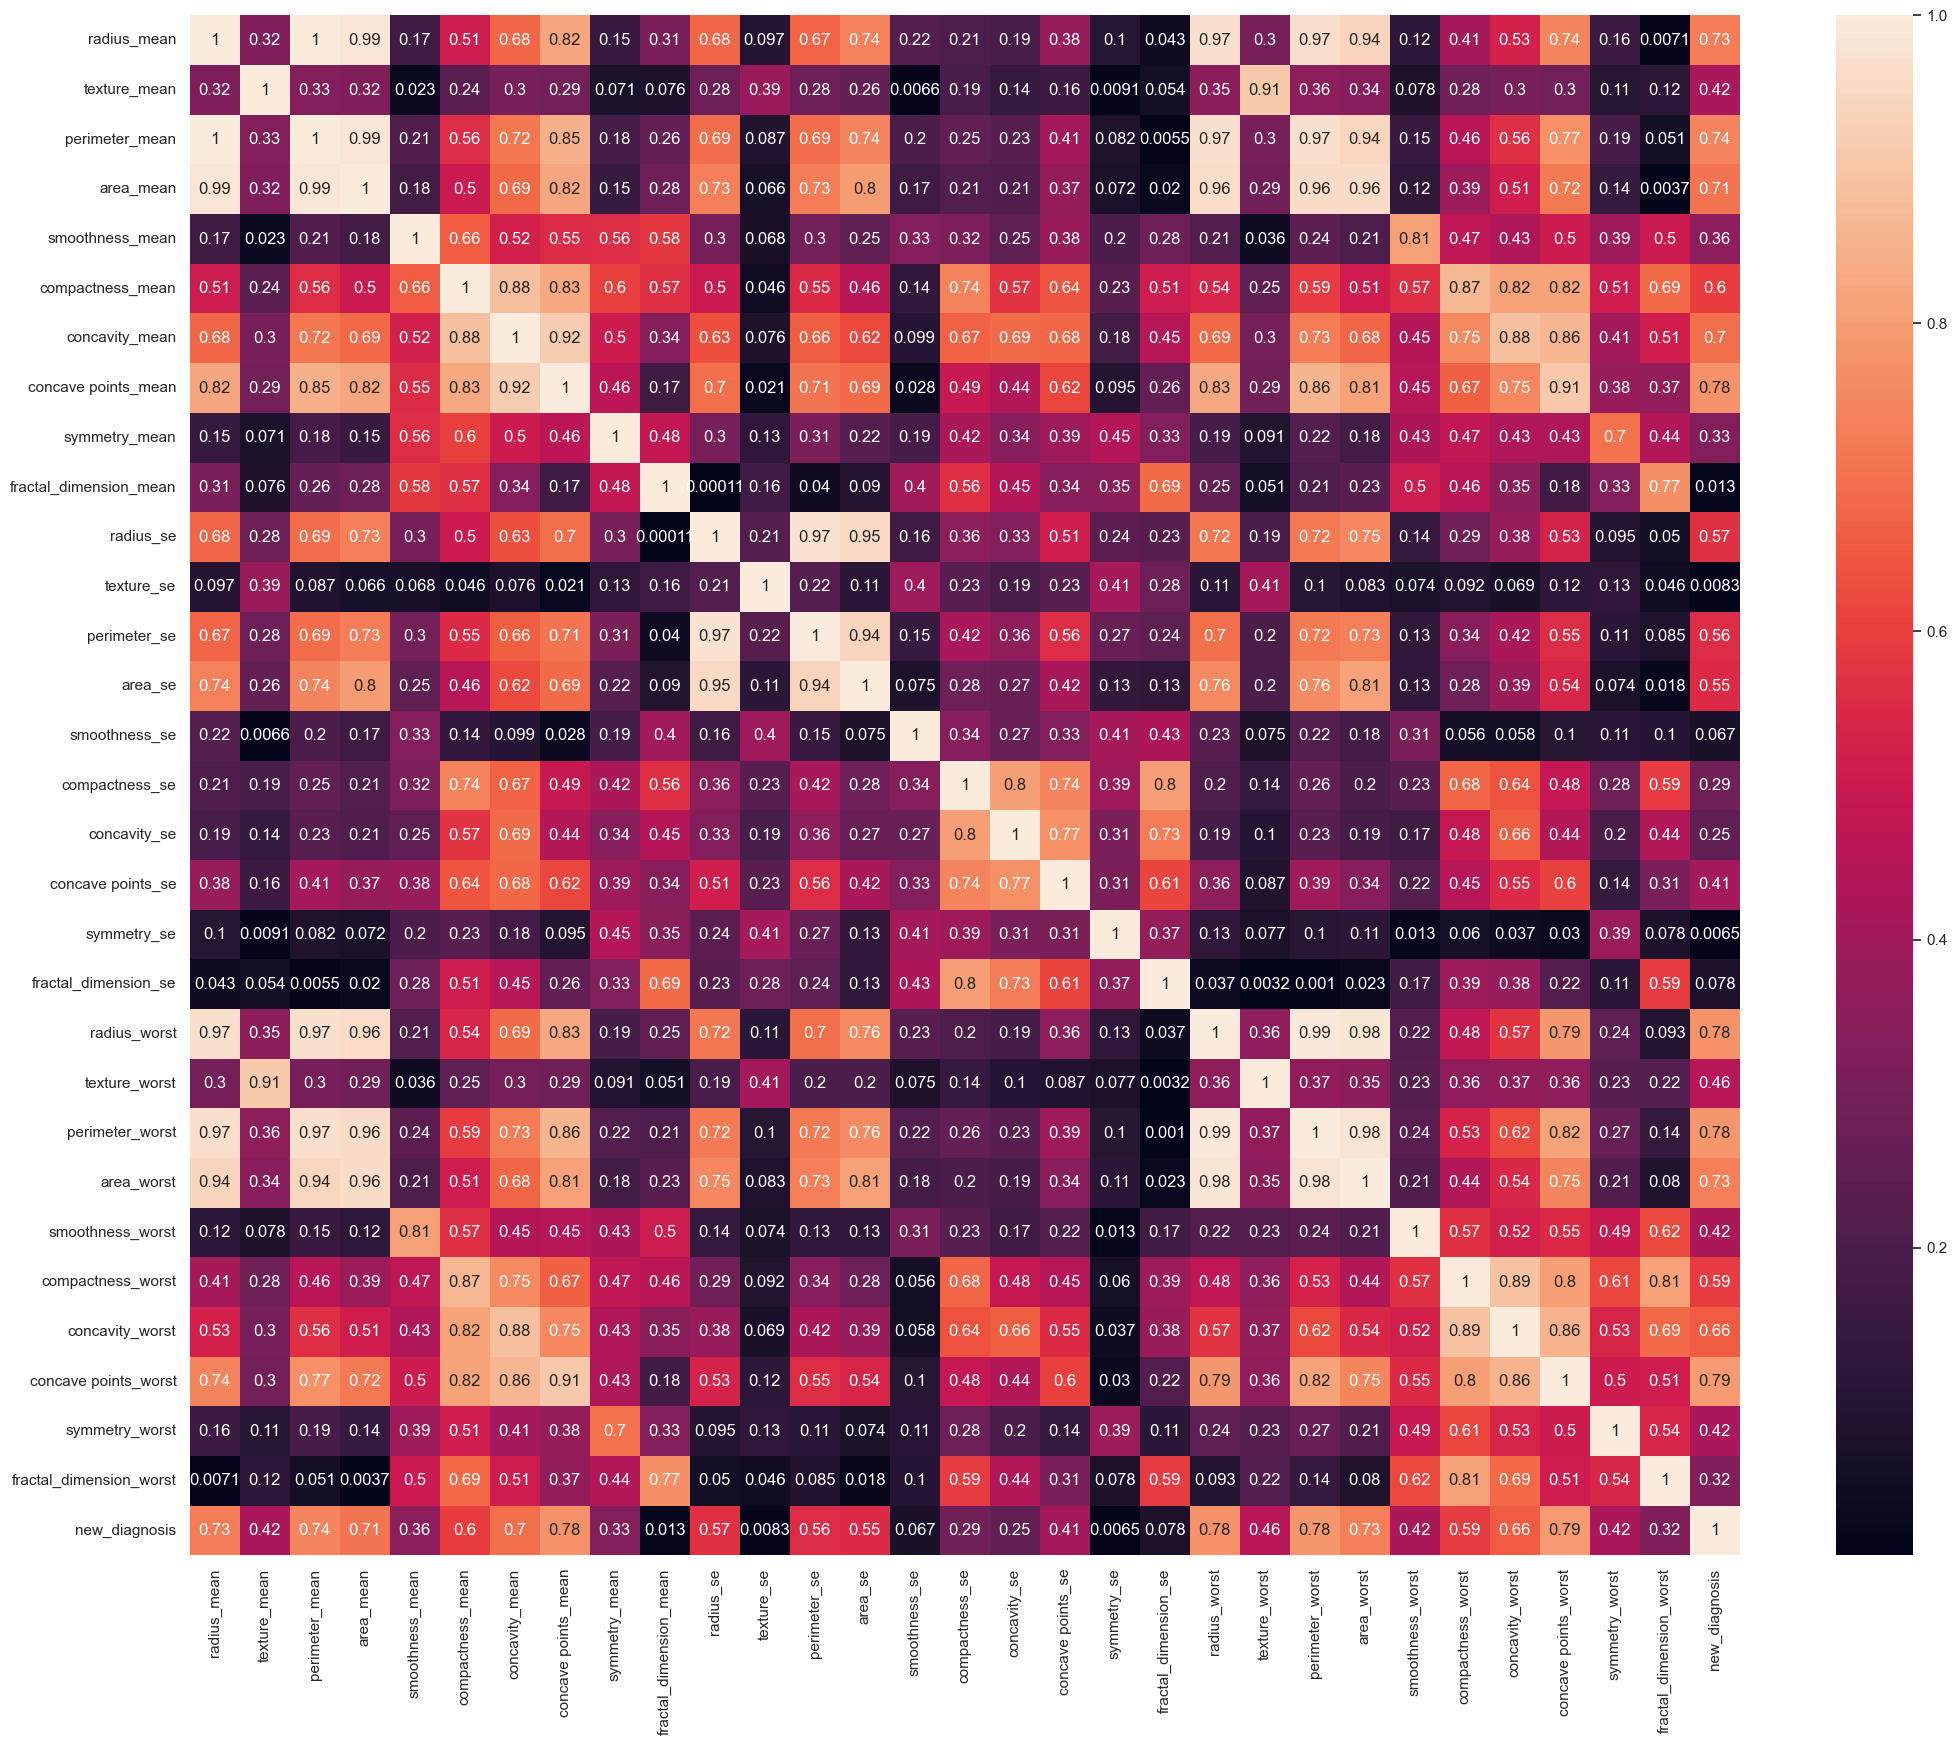

In [155]:
#correlation plot
sns.set(rc = {'figure.figsize':(25,20)})
corr = df.corr().abs()
sns.heatmap(corr,annot=True)
plt.show()

### Removing columns having correlation close to zero

In [156]:
df=df.drop(['fractal_dimension_mean','texture_se','smoothness_se','symmetry_se','fractal_dimension_se','compactness_se'],axis=1)

In [157]:
float64_cols = ['float64']
float64_lst = list(df.select_dtypes(include=float64_cols).columns)
print("total number of numerical columns are ", len(float64_lst))
print("there names are as follows: ", float64_lst)

total number of numerical columns are  24
there names are as follows:  ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [158]:
df.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   radius_se  ...  texture_worst  perimeter_worst  area_worst  \
0     1.0950  ...          17.33           184.60      2019.0   
1     0.5435  ...          23.41           158.80      1956.0   
2     0.7456  ...          25.53           152.50      1709.0   
3     0.4956  ...          26.50            98.87       567.7   
4     0.7572  ...          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  new_diagnosis  
0          0.4601                  0.11890              1  
1          0.2750                  0.08902              1  
2          0.3613                  0.08758              1  
3          0.6638                  0.17300              1  
4          0.2364                  0.07678              1  

[5 rows x 25 columns]

### Skewness
Skewness is a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images. A distribution can have right (or positive), left (or negative), or zero skewness

In [159]:
def right_nor_left(df, int64_lst):
    
    temp_skewness = ['column', 'skewness_value', 'skewness (+ve or -ve)']
    temp_skewness_values  = []
    
    temp_total = ["positive (+ve) skewed", "normal distrbution" , "negative (-ve) skewed"]
    positive = 0
    negative = 0
    normal = 0
    
    for value in int64_lst:
    
        rs = round(df[value].skew(),4)

        if rs > 0:
            temp_skewness_values.append([value,rs , "positive (+ve) skewed"])   
            positive = positive + 1

        elif rs == 0:
            temp_skewness_values.append([value,rs,"normal distrbution"])
            normal = normal + 1

        elif rs < 0:
            temp_skewness_values.append([value,rs, "negative (-ve) skewed"])
            negative = negative + 1
    
    skewness_df =  pd.DataFrame(temp_skewness_values, columns=temp_skewness) 
    skewness_total_df =  pd.DataFrame([[positive, normal, negative]], columns=temp_total) 
    
    return skewness_df, skewness_total_df


In [160]:
skew_df,skew_total_df=right_nor_left(df, float64_lst)

In [161]:
skew_df

column  skewness_value  skewness (+ve or -ve)
0               radius_mean          0.9424  positive (+ve) skewed
1              texture_mean          0.6504  positive (+ve) skewed
2            perimeter_mean          0.9907  positive (+ve) skewed
3                 area_mean          1.6457  positive (+ve) skewed
4           smoothness_mean          0.4563  positive (+ve) skewed
5          compactness_mean          1.1901  positive (+ve) skewed
6            concavity_mean          1.4012  positive (+ve) skewed
7       concave points_mean          1.1712  positive (+ve) skewed
8             symmetry_mean          0.7256  positive (+ve) skewed
9                 radius_se          3.0886  positive (+ve) skewed
10             perimeter_se          3.4436  positive (+ve) skewed
11                  area_se          5.4472  positive (+ve) skewed
12             concavity_se          5.1105  positive (+ve) skewed
13        concave points_se          1.4447  positive (+ve) skewed
14             radius_worst          1.1031  positive (+ve) skewed
15            texture_worst          0.4983  positive (+ve) skewed
16          perimeter_worst          1.1282  positive (+ve) skewed
17               area_worst          1.8594  positive (+ve) skewed
18         smoothness_worst          0.4154  positive (+ve) skewed
19        compactness_worst          1.4736  positive (+ve) skewed
20          concavity_worst          1.1502  positive (+ve) skewed
21     concave points_worst          0.4926  positive (+ve) skewed
22           symmetry_worst          1.4339  positive (+ve) skewed
23  fractal_dimension_worst          1.6626  positive (+ve) skewed

In [162]:
skew_total_df

positive (+ve) skewed  normal distrbution  negative (-ve) skewed
0                     24                   0                      0

### With the statistical analysis we have found that the data have a lot of skewness in them and all are positively skewed. 

### Removing or Minimizing Skewness

In [163]:
df2=pd.DataFrame(df)

In [164]:
df2.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   radius_se  ...  texture_worst  perimeter_worst  area_worst  \
0     1.0950  ...          17.33           184.60      2019.0   
1     0.5435  ...          23.41           158.80      1956.0   
2     0.7456  ...          25.53           152.50      1709.0   
3     0.4956  ...          26.50            98.87       567.7   
4     0.7572  ...          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  new_diagnosis  
0          0.4601                  0.11890              1  
1          0.2750                  0.08902              1  
2          0.3613                  0.08758              1  
3          0.6638                  0.17300              1  
4          0.2364                  0.07678              1  

[5 rows x 25 columns]

In [165]:
for i in float64_lst:
    s='new_'+i
    df2[s]=np.sqrt(df[i])

In [166]:
df2.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   radius_se  ...  new_radius_worst  new_texture_worst  new_perimeter_worst  \
0     1.0950  ...          5.037857           4.162932            13.586758   
1     0.5435  ...          4.999000           4.838388            12.601587   
2     0.7456  ...          4.854894           5.052722            12.349089   
3     0.4956  ...          3.861347           5.147815             9.943339   
4     0.7572  ...          4.747631           4.082891            12.336936   

   new_area_worst  new_smoothness_worst  new_compactness_worst  \
0       44.933284              0.402741               0.815843   
1       44.226689              0.351852               0.431972   
2       41.340053              0.380000               0.651537   
3       23.826456              0.458039               0.930752   
4       39.686270              0.370675               0.452769   

   new_concavity_worst  new_concave points_worst  new_symmetry_worst  \
0             0.843742                  0.515170            0.678307   
1             0.491528                  0.431277            0.524404   
2             0.671118                  0.492950            0.601082   
3             0.828794                  0.507445            0.814739   
4             0.632456                  0.403113            0.486210   

   new_fractal_dimension_worst  
0                     0.344819  
1                     0.298362  
2                     0.295939  
3                     0.415933  
4                     0.277092  

[5 rows x 49 columns]

In [167]:
df2=df2.drop(float64_lst,axis=1)

In [168]:
df2.head()

new_diagnosis  new_radius_mean  new_texture_mean  new_perimeter_mean  \
0              1         4.241462          3.221801           11.081516   
1              1         4.535416          4.215448           11.528226   
2              1         4.437342          4.609772           11.401754   
3              1         3.379349          4.514421            8.807951   
4              1         4.504442          3.786819           11.623253   

   new_area_mean  new_smoothness_mean  new_compactness_mean  \
0      31.638584             0.344093              0.526878   
1      36.414283             0.291101              0.280428   
2      34.684290             0.331059              0.399875   
3      19.649427             0.377492              0.532823   
4      36.013886             0.316702              0.364417   

   new_concavity_mean  new_concave points_mean  new_symmetry_mean  ...  \
0            0.547814                 0.383536           0.491833  ...   
1            0.294788                 0.264896           0.425676  ...   
2            0.444297                 0.357631           0.454863  ...   
3            0.491325                 0.324345           0.509608  ...   
4            0.444972                 0.322955           0.425323  ...   

   new_radius_worst  new_texture_worst  new_perimeter_worst  new_area_worst  \
0          5.037857           4.162932            13.586758       44.933284   
1          4.999000           4.838388            12.601587       44.226689   
2          4.854894           5.052722            12.349089       41.340053   
3          3.861347           5.147815             9.943339       23.826456   
4          4.747631           4.082891            12.336936       39.686270   

   new_smoothness_worst  new_compactness_worst  new_concavity_worst  \
0              0.402741               0.815843             0.843742   
1              0.351852               0.431972             0.491528   
2              0.380000               0.651537             0.671118   
3              0.458039               0.930752             0.828794   
4              0.370675               0.452769             0.632456   

   new_concave points_worst  new_symmetry_worst  new_fractal_dimension_worst  
0                  0.515170            0.678307                     0.344819  
1                  0.431277            0.524404                     0.298362  
2                  0.492950            0.601082                     0.295939  
3                  0.507445            0.814739                     0.415933  
4                  0.403113            0.486210                     0.277092  

[5 rows x 25 columns]

In [169]:
float64_cols = ['float64']
float64_lst2 = list(df2.select_dtypes(include=float64_cols).columns)

In [170]:
skew_df,skew_total_df=right_nor_left(df2, float64_lst2)

In [171]:
skew_df

column  skewness_value  skewness (+ve or -ve)
0               new_radius_mean          0.6229  positive (+ve) skewed
1              new_texture_mean          0.3099  positive (+ve) skewed
2            new_perimeter_mean          0.6535  positive (+ve) skewed
3                 new_area_mean          0.9338  positive (+ve) skewed
4           new_smoothness_mean          0.1909  positive (+ve) skewed
5          new_compactness_mean          0.5648  positive (+ve) skewed
6            new_concavity_mean          0.3600  positive (+ve) skewed
7       new_concave points_mean          0.2438  positive (+ve) skewed
8             new_symmetry_mean          0.4412  positive (+ve) skewed
9                 new_radius_se          1.4777  positive (+ve) skewed
10             new_perimeter_se          1.6359  positive (+ve) skewed
11                  new_area_se          2.1420  positive (+ve) skewed
12             new_concavity_se          0.9379  positive (+ve) skewed
13        new_concave points_se         -0.4210  negative (-ve) skewed
14             new_radius_worst          0.7832  positive (+ve) skewed
15            new_texture_worst          0.1802  positive (+ve) skewed
16          new_perimeter_worst          0.7861  positive (+ve) skewed
17               new_area_worst          1.1078  positive (+ve) skewed
18         new_smoothness_worst          0.1353  positive (+ve) skewed
19        new_compactness_worst          0.6049  positive (+ve) skewed
20          new_concavity_worst          0.0279  positive (+ve) skewed
21     new_concave points_worst         -0.4434  negative (-ve) skewed
22           new_symmetry_worst          0.8902  positive (+ve) skewed
23  new_fractal_dimension_worst          1.1805  positive (+ve) skewed

In [172]:
skew_total_df

positive (+ve) skewed  normal distrbution  negative (-ve) skewed
0                     22                   0                      2

### After minimizing skewness we have found that the data have 22 positively skewed and 2 negatively skewed. 

### Observation: -
Here, we observe the skewness, variance, mean, median, mode, min, max of the dataset

# Step 4 : Data Preprocessing and Data Cleaning

In [173]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   new_diagnosis                569 non-null    int32  
 1   new_radius_mean              569 non-null    float64
 2   new_texture_mean             569 non-null    float64
 3   new_perimeter_mean           569 non-null    float64
 4   new_area_mean                569 non-null    float64
 5   new_smoothness_mean          569 non-null    float64
 6   new_compactness_mean         569 non-null    float64
 7   new_concavity_mean           569 non-null    float64
 8   new_concave points_mean      569 non-null    float64
 9   new_symmetry_mean            569 non-null    float64
 10  new_radius_se                569 non-null    float64
 11  new_perimeter_se             569 non-null    float64
 12  new_area_se                  569 non-null    float64
 13  new_concavity_se    

### Observation: -
As we can see that there is 24 float and 1 integer datatype value

# Step 5 : Data Visualization

# In this section we will plot various graphs and with the help of those graph we will analyse the data more effectively and properly.

### Graphs we are going to develop in this step are: -

### 1) Histogram of all columns to check the distrubution of the columns
### 2) Distplot or distribution plot of all columns to check the variation in the data distribution
### 3) Heatmap to calculate correlation within feature variables
### 4) Boxplot to find out outlier in the feature columns

### Histogram 

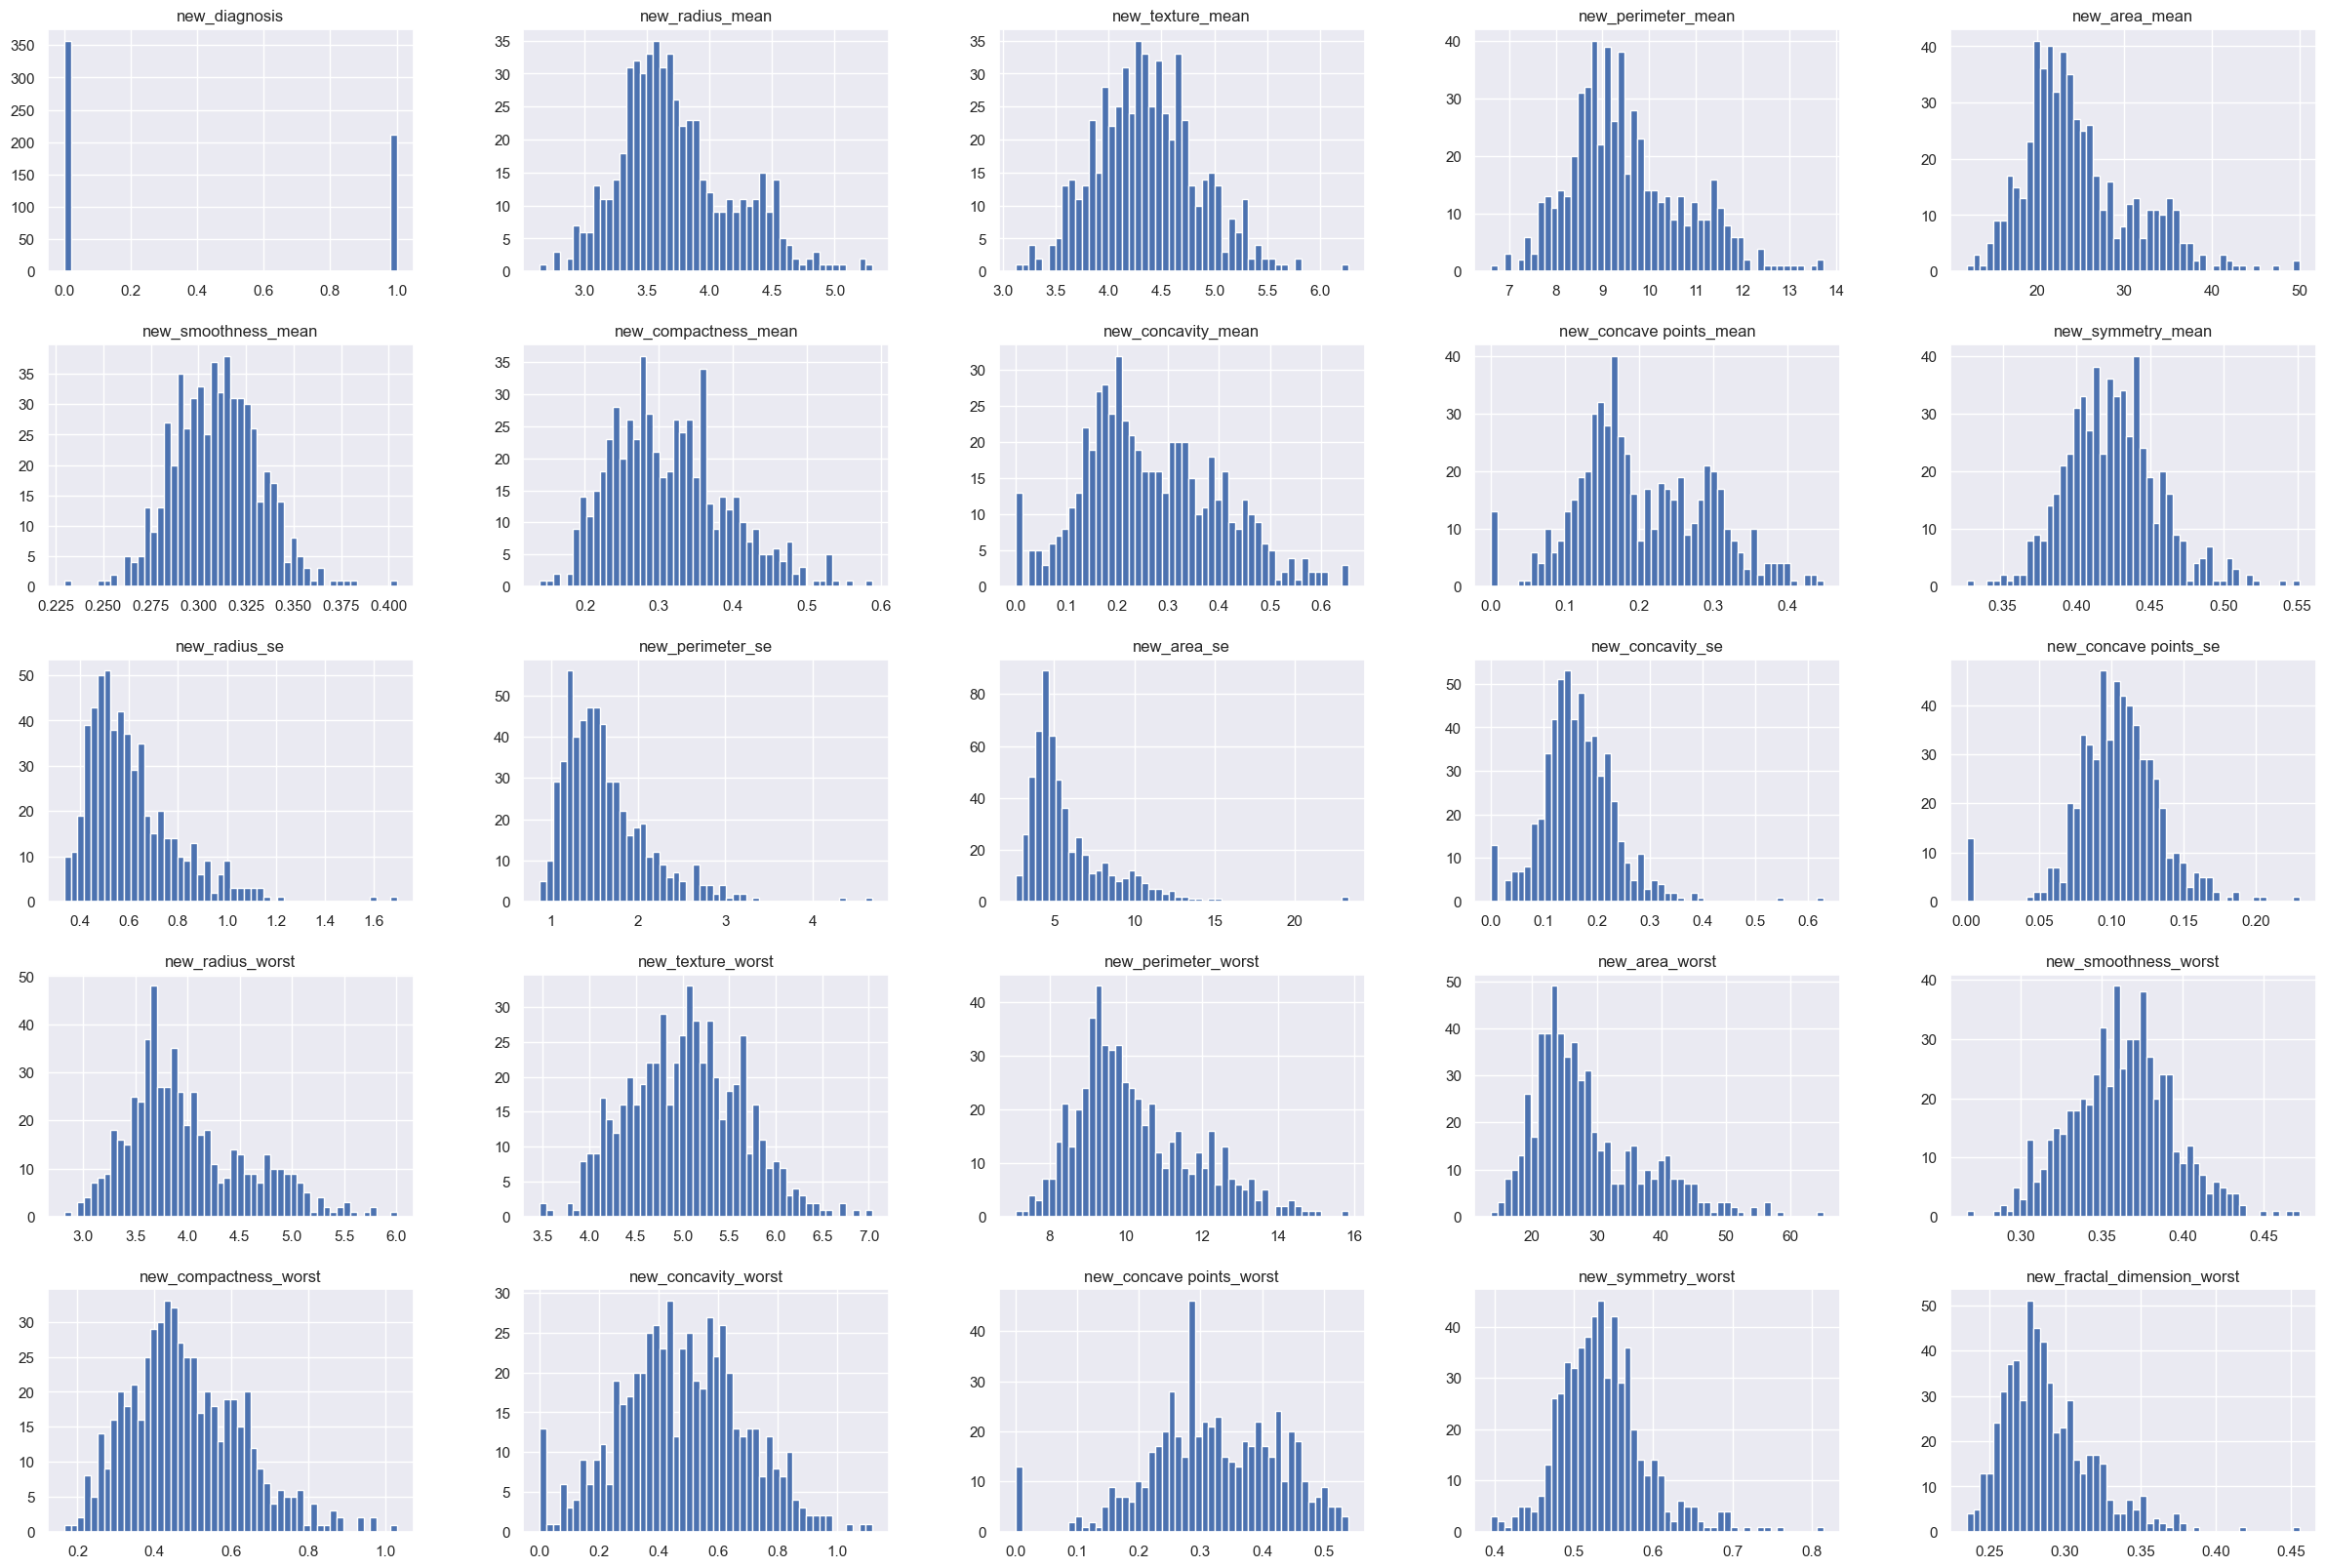

In [174]:
# Distribution in attributes
%matplotlib inline
import matplotlib.pyplot as plt
df2.hist(bins=50, figsize=(30,20))
plt.show()

### Distplot 

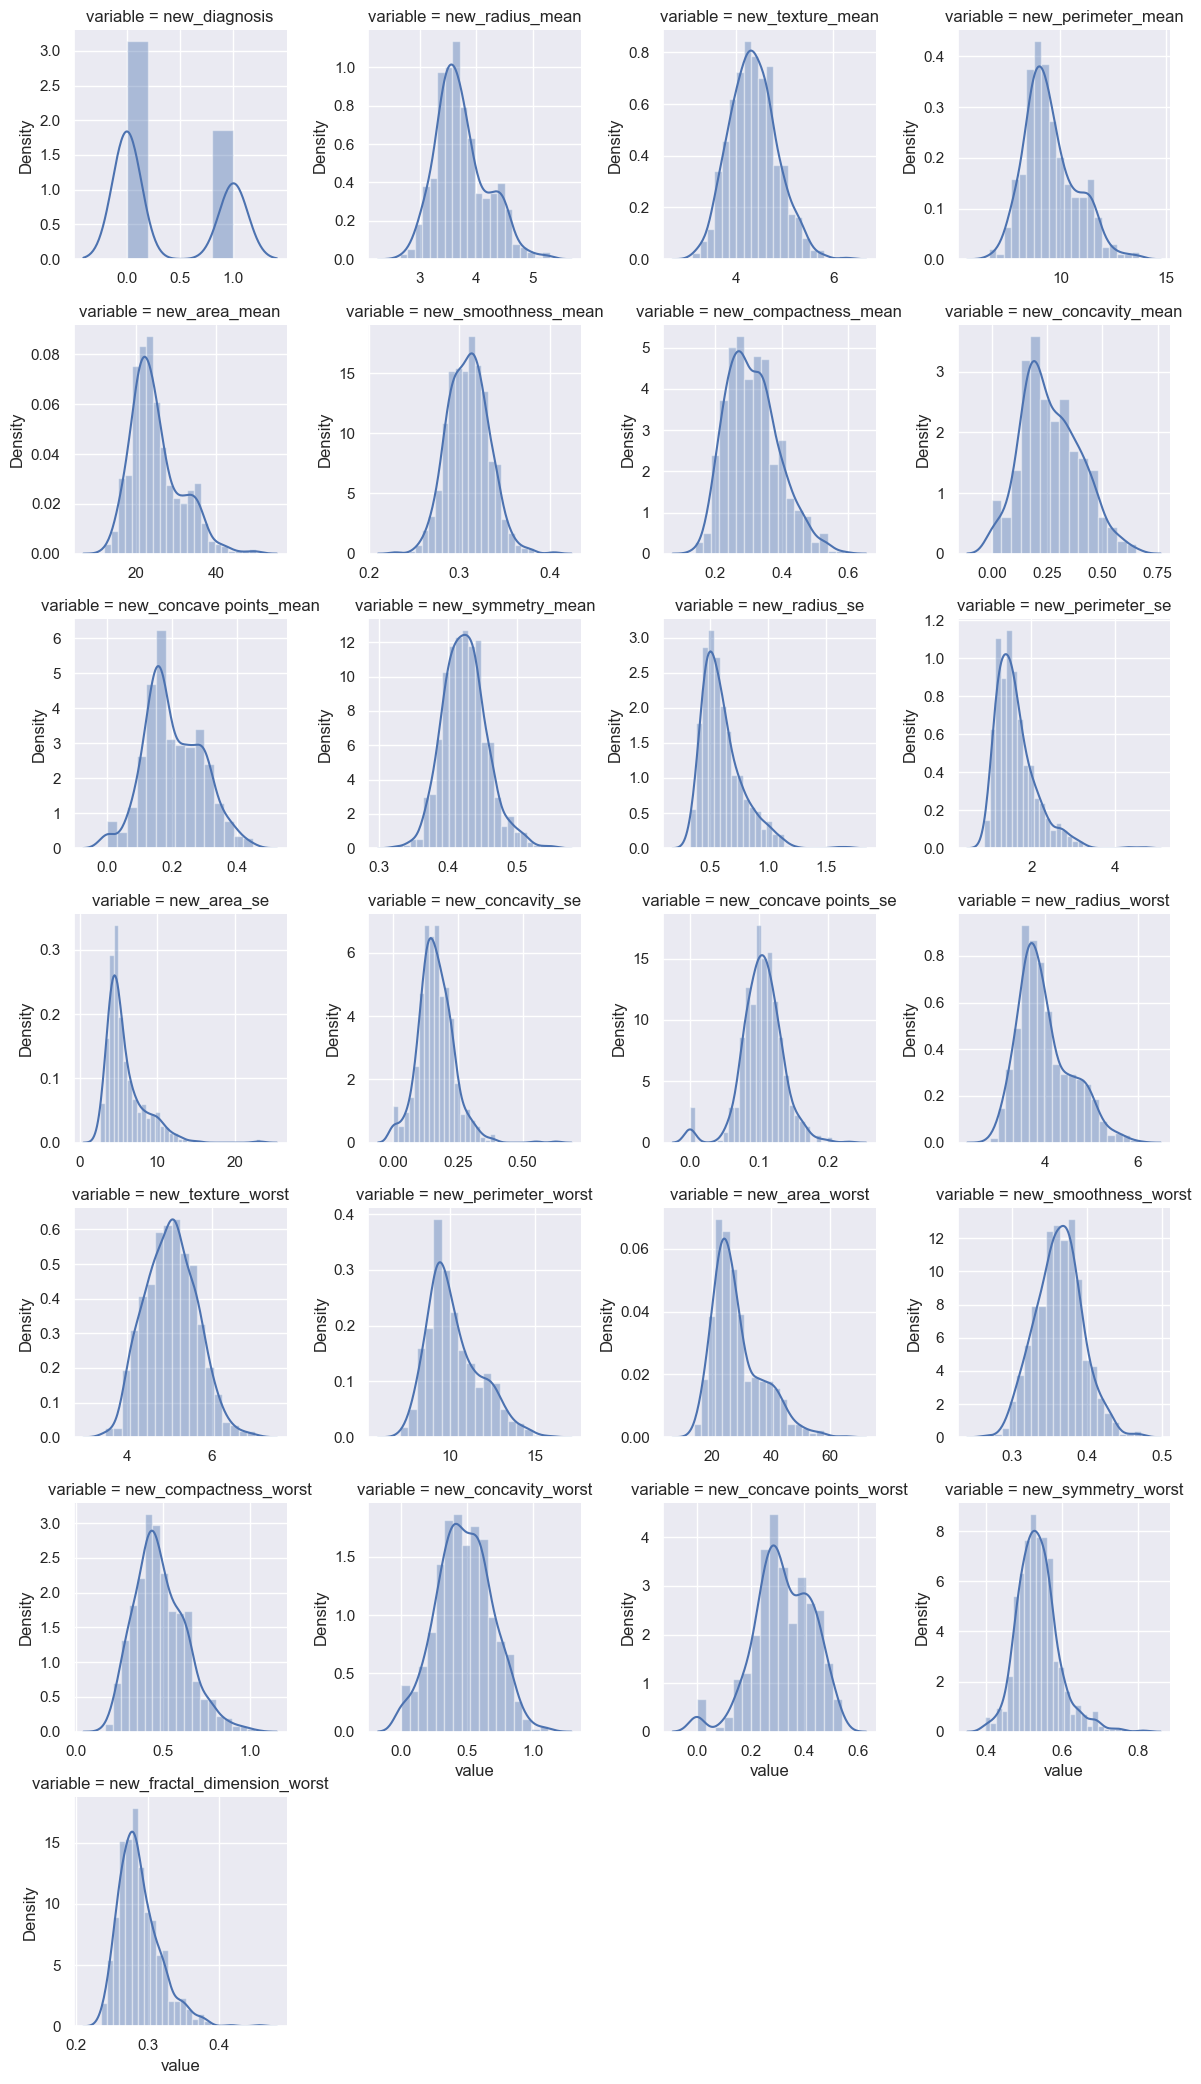

In [175]:
num = [f for f in df2.columns if df2.dtypes[f] != 'object']
nd = pd.melt(df2, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

### Observation: -
#### With the distplot we get the graphical view of the skewness of the data. With that we get the following observation: -
 1) 22 Columns are positively skewed.
 
 2) 2 Columns are negatively skewed.


### Displot of Label variable

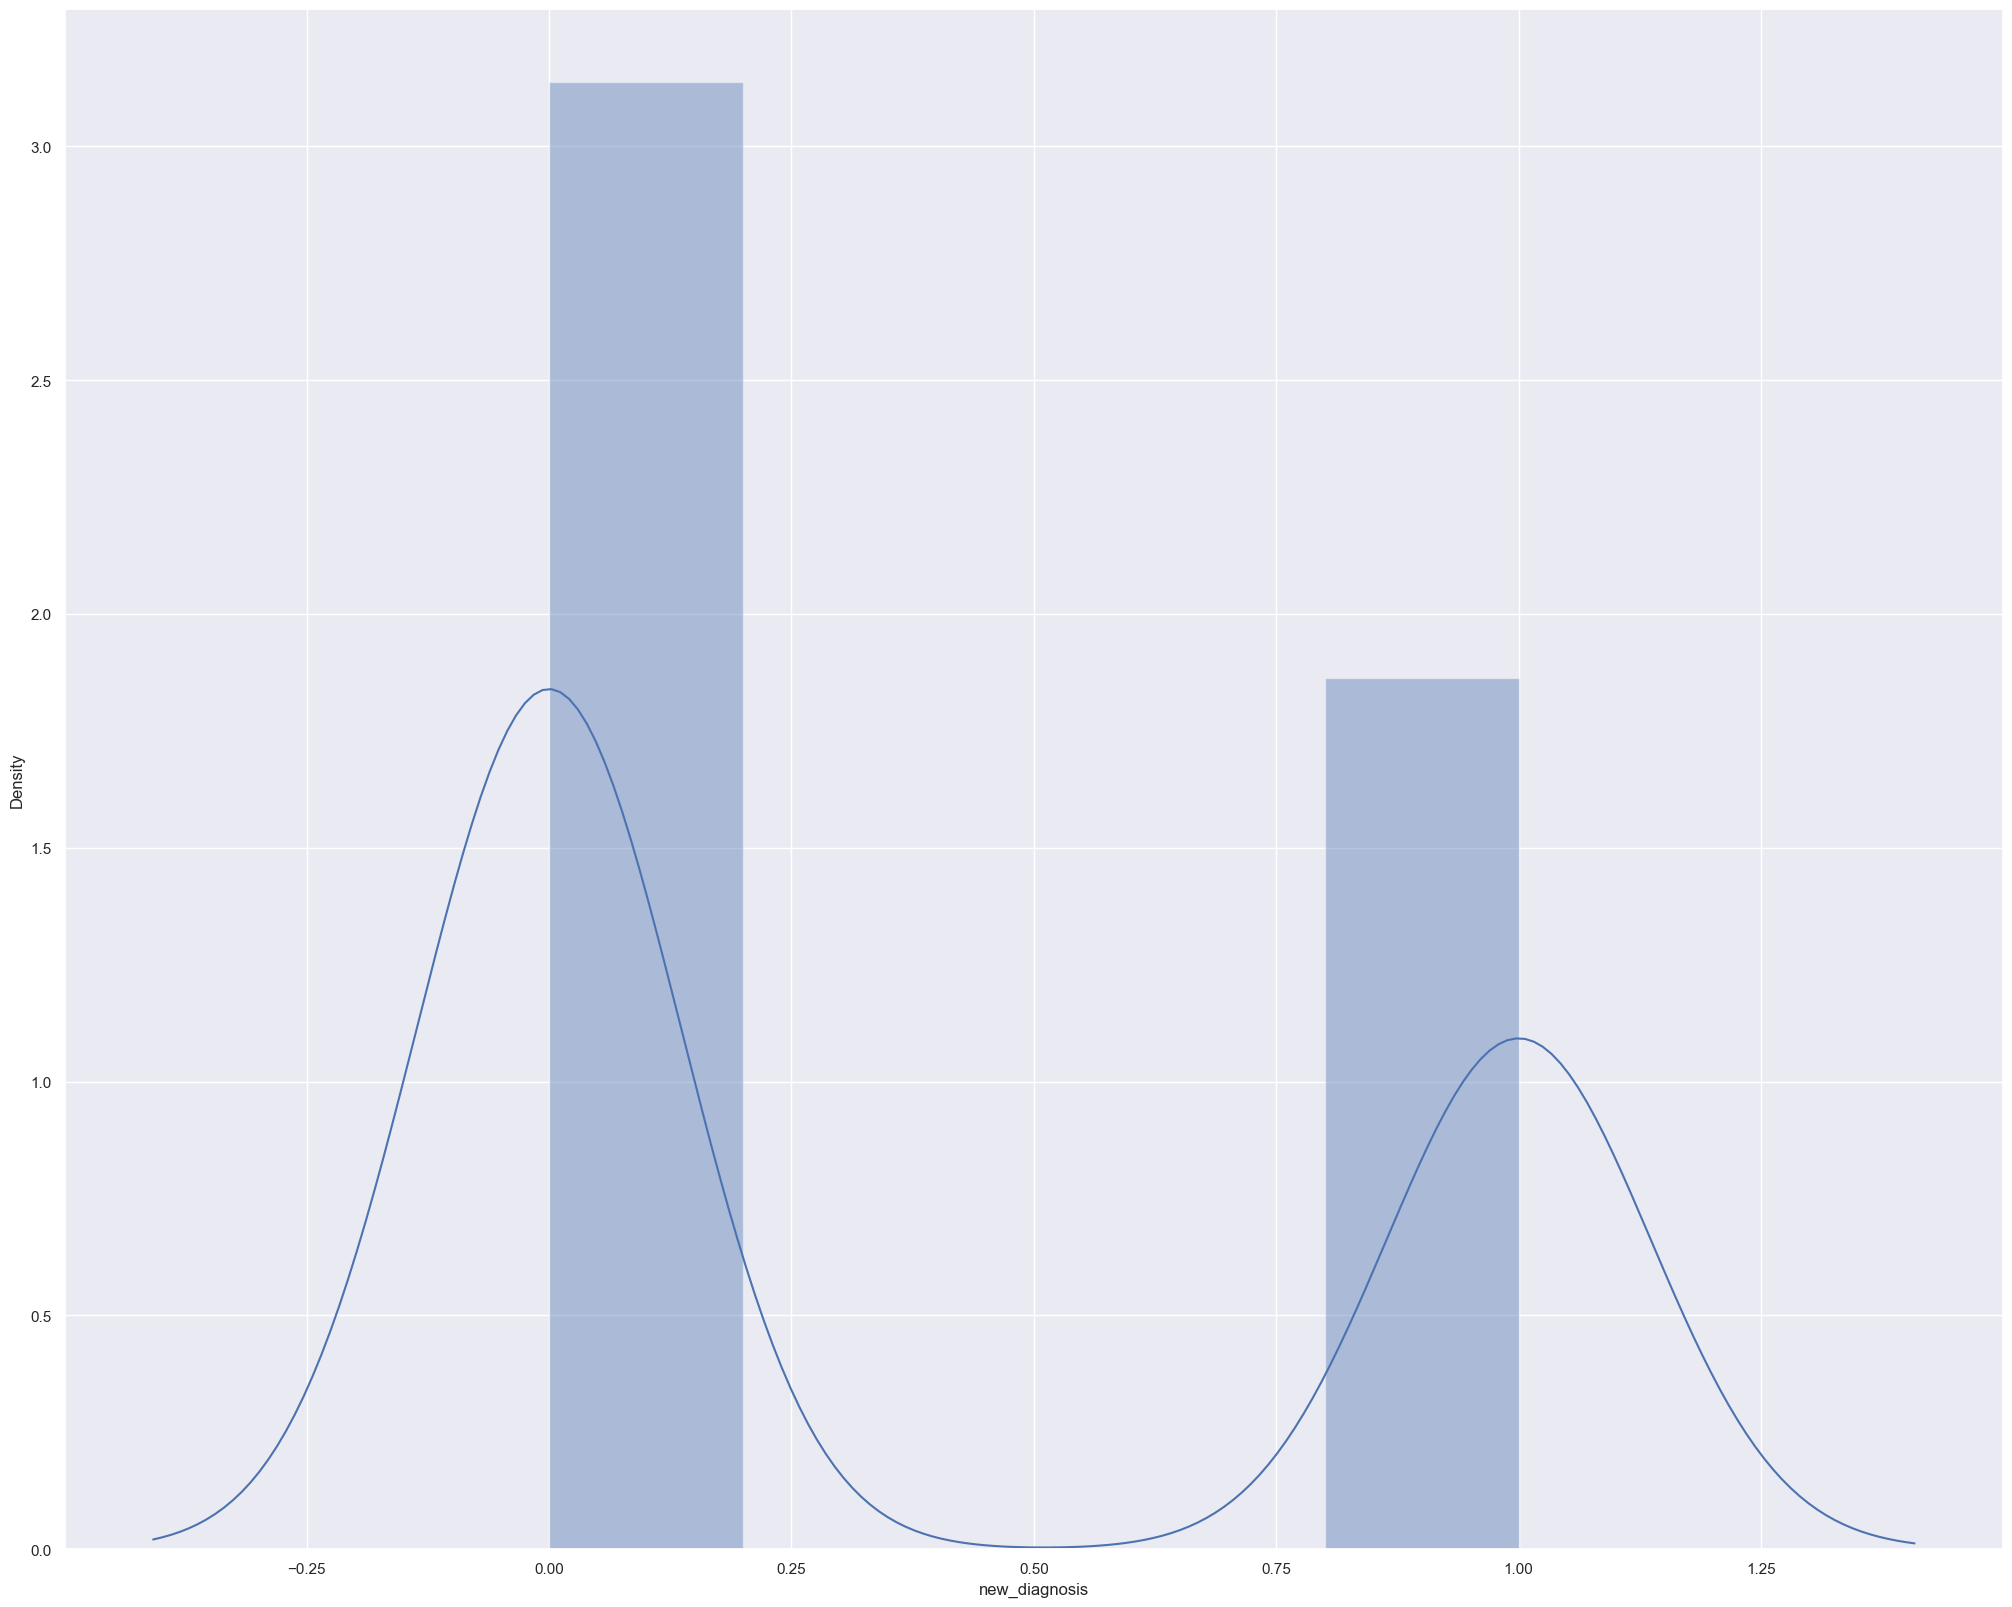

In [176]:
sns.distplot(df2['new_diagnosis'])
plt.show()

## Heatmap 

### Correlation within feature variables

#### Correlation : A positive correlation is a relationship between two variables in which both variables move in the same direction. Therefore, when one variable increases as the other variable increases, or one variable decreases while the other decreases.

#### Correlation can have a value: -
1) 1 is a perfect positive correlation.

2) 0 is no correlation (the values don't seem linked at all).

3) -1 is a perfect negative correlation. 

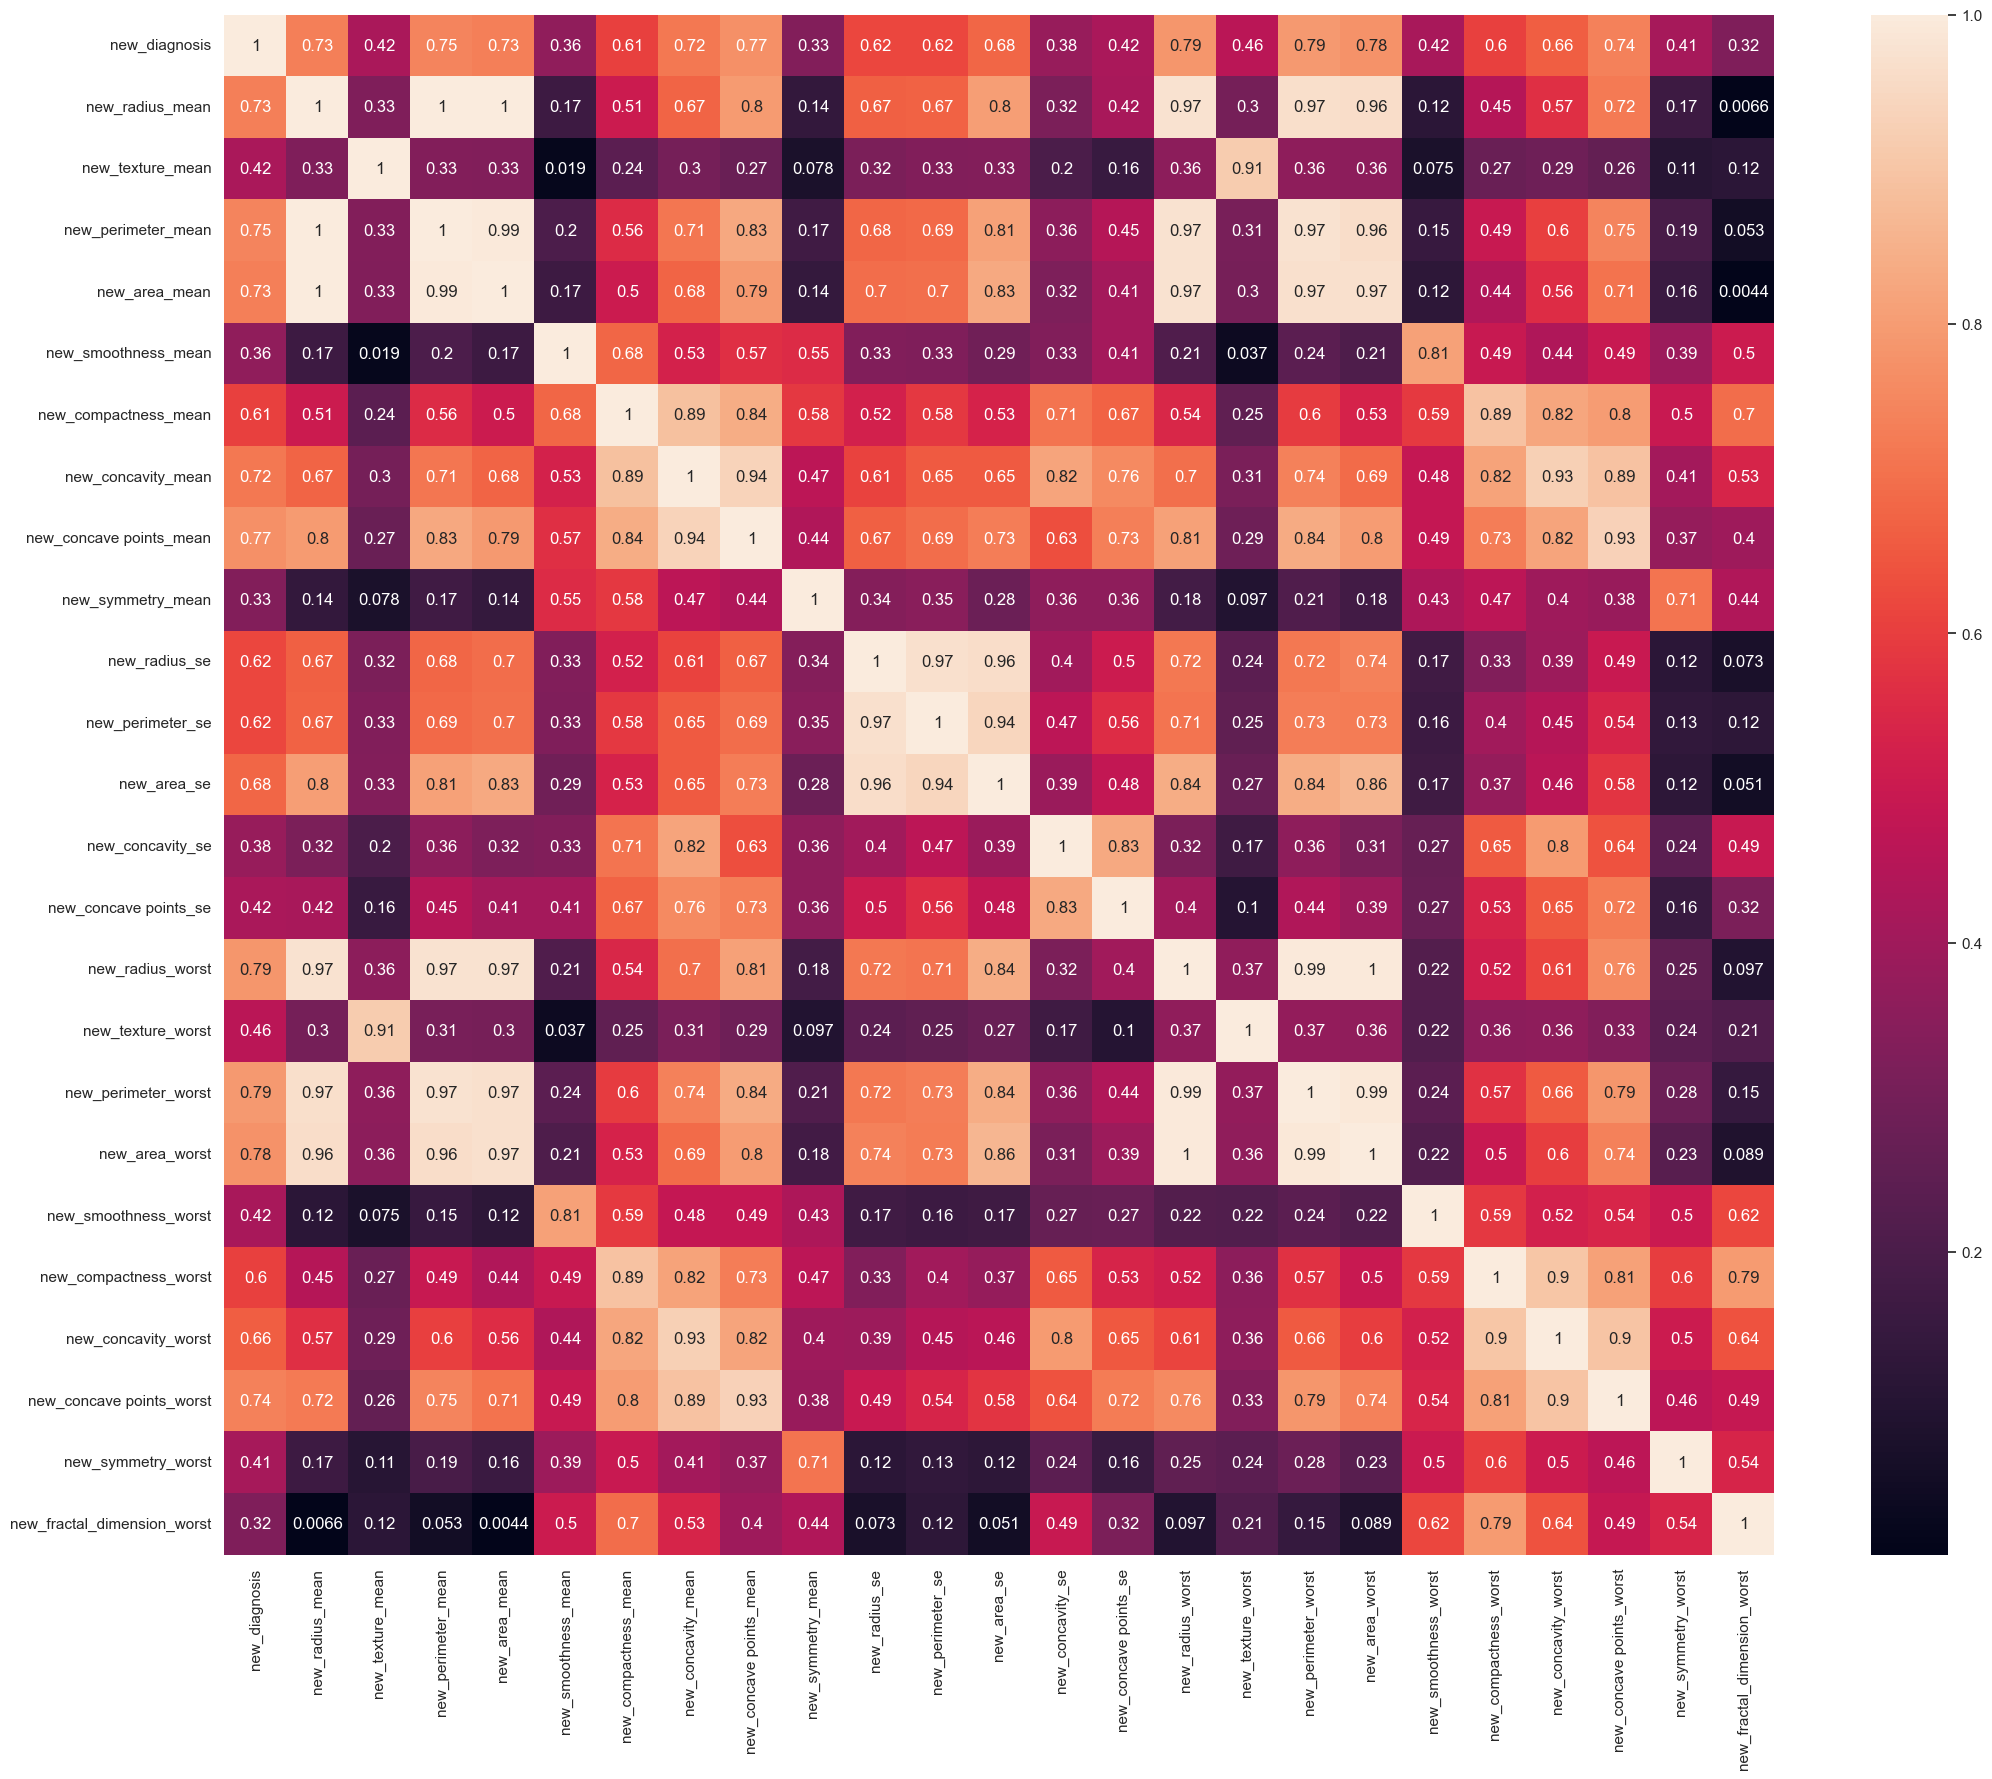

In [177]:
#correlation plot
sns.set(rc = {'figure.figsize':(25,20)})
corr = df2.corr().abs()
sns.heatmap(corr,annot=True)
plt.show()

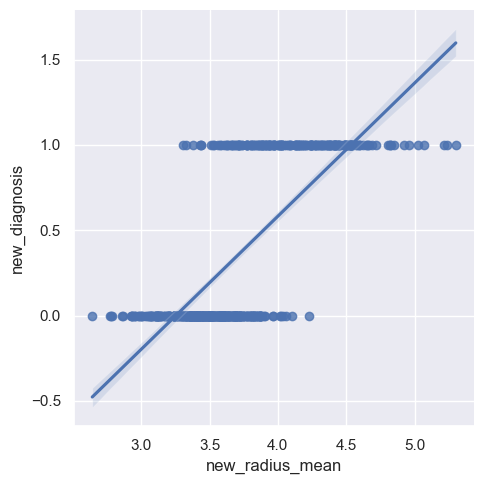

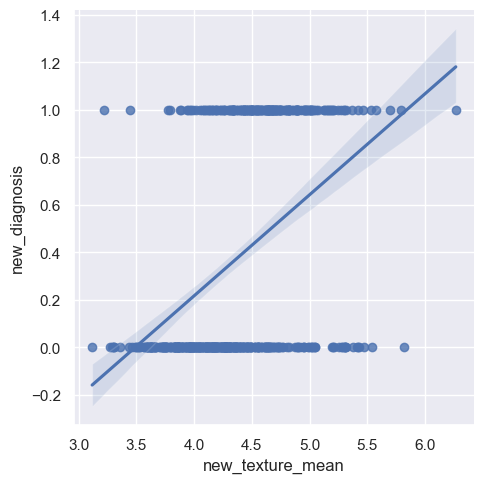

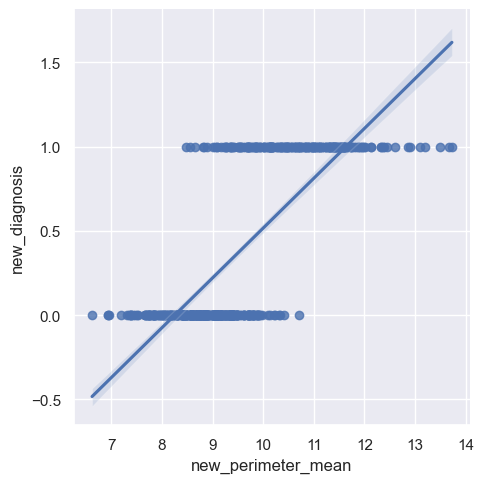

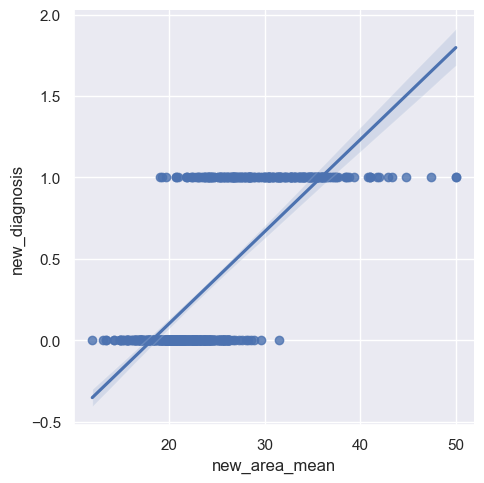

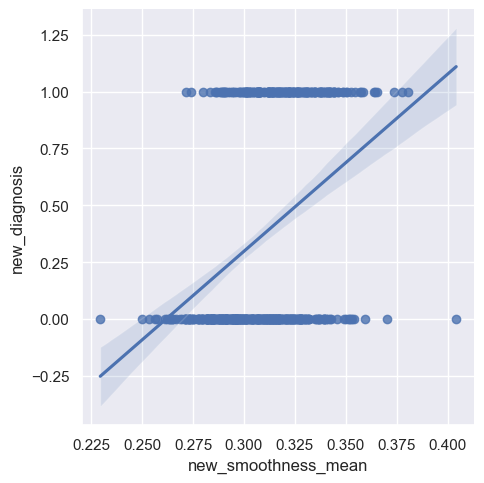

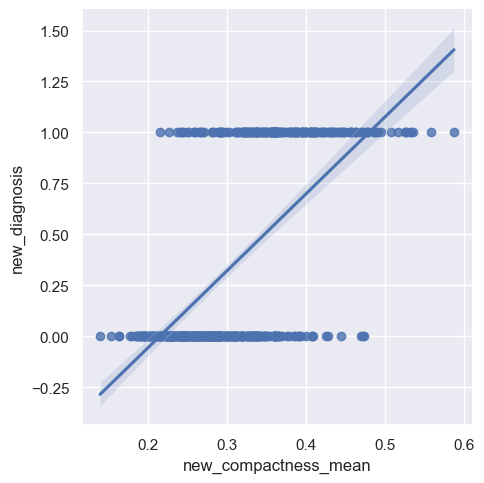

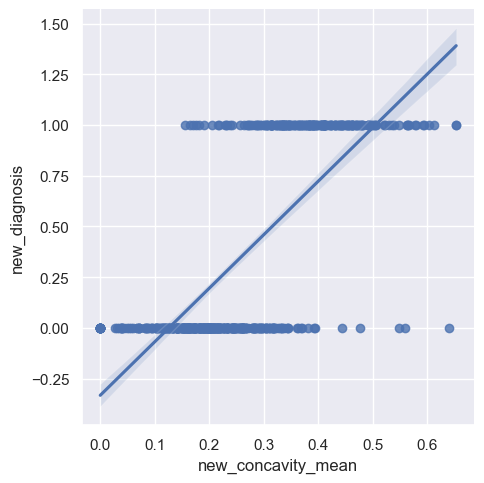

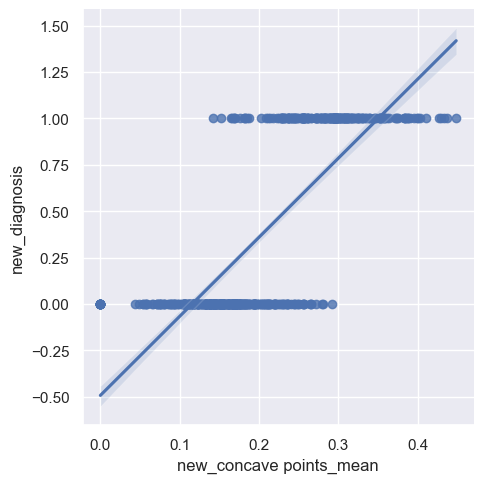

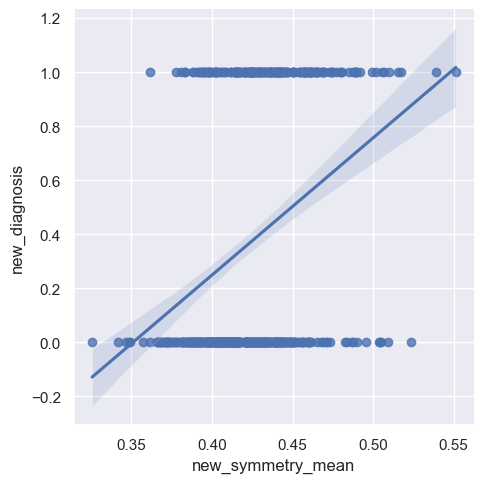

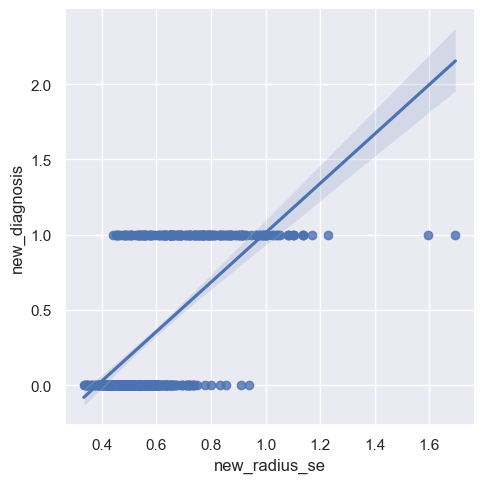

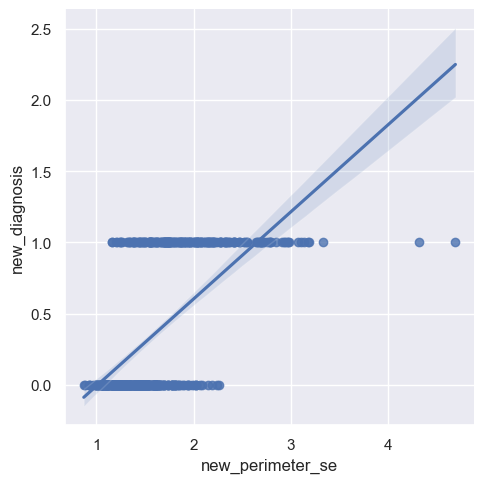

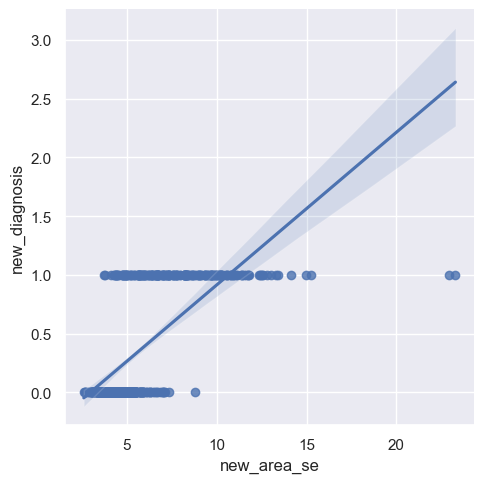

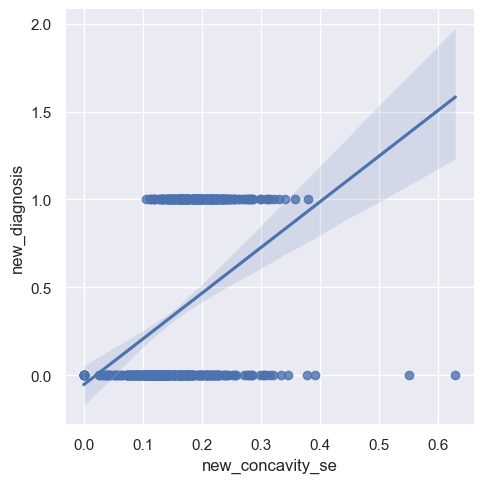

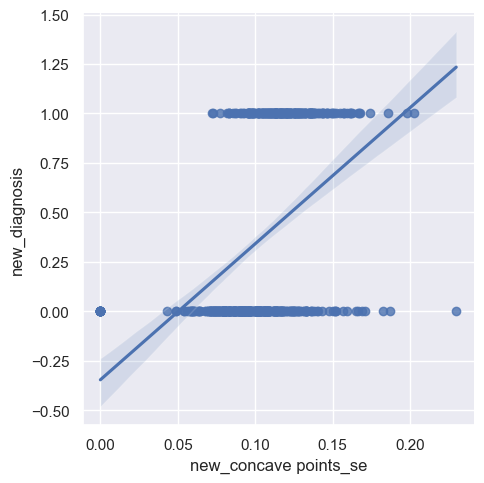

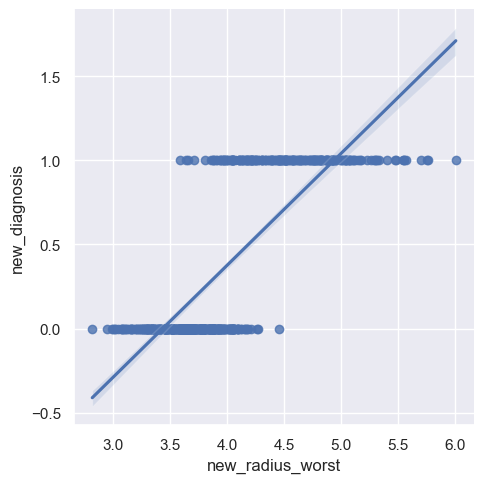

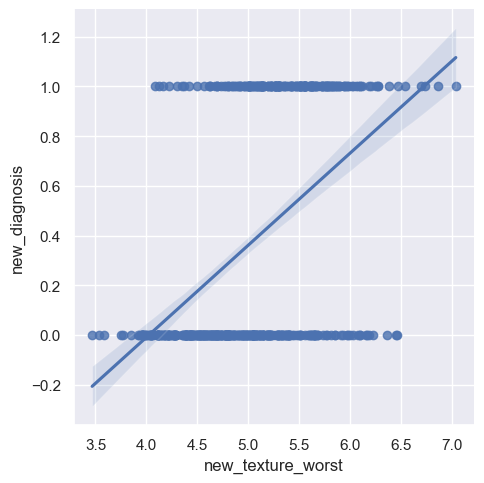

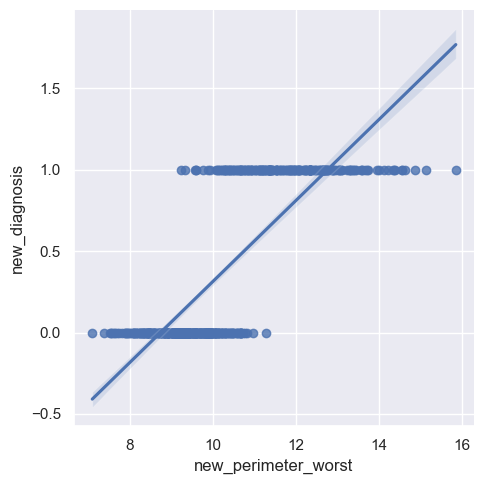

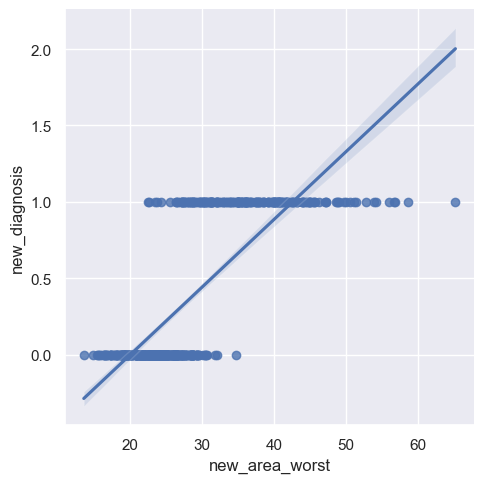

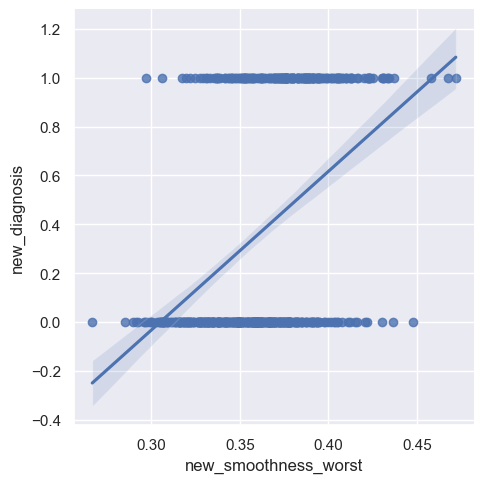

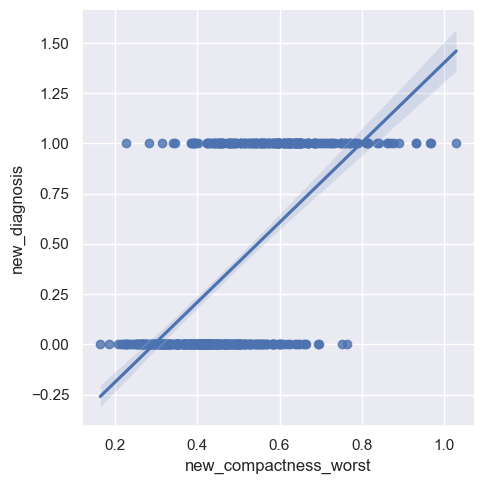

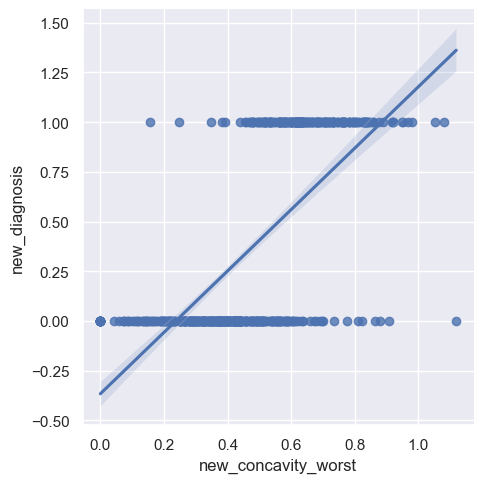

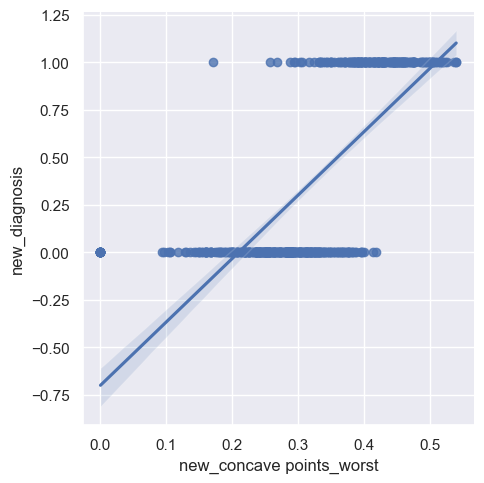

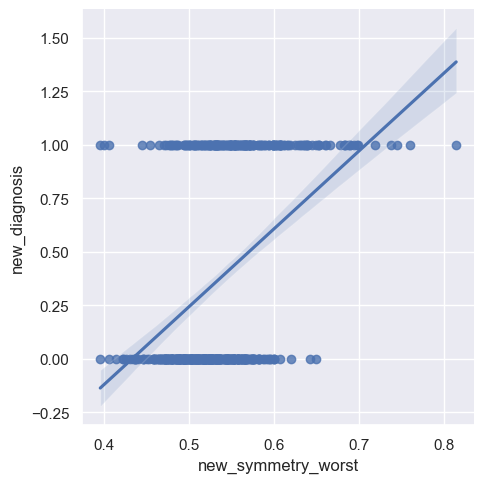

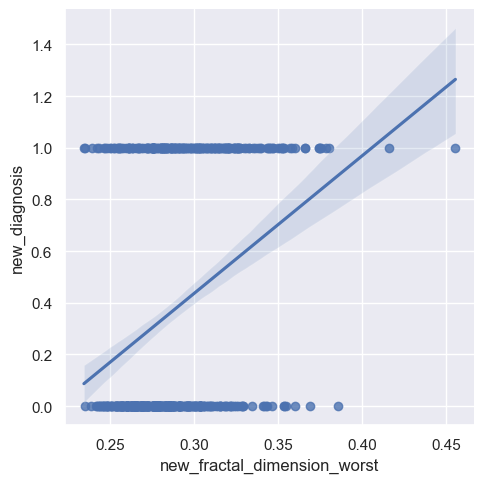

In [178]:
for value in float64_lst2:
    sns.lmplot(x=value, y="new_diagnosis", data=df2);

plt.show()

# Boxplot

### Outliers
#### In statistics, an outlier is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. 

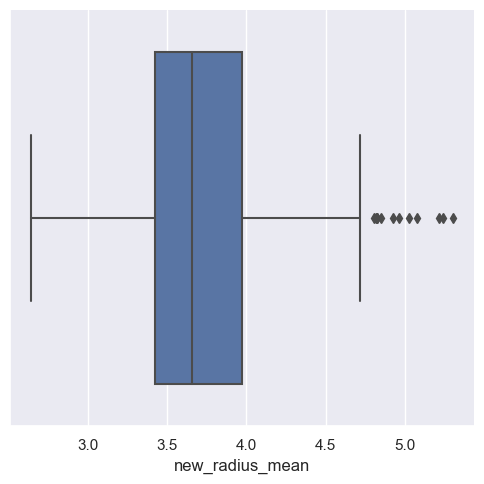

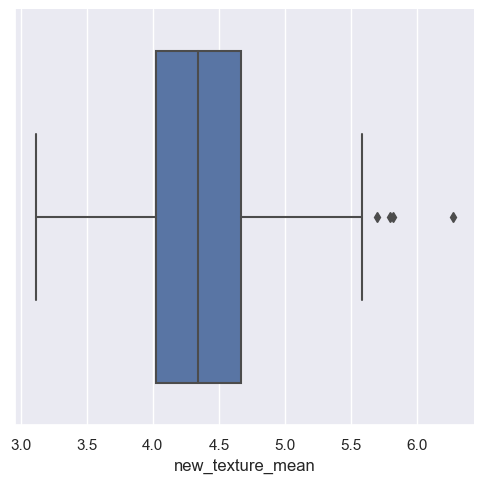

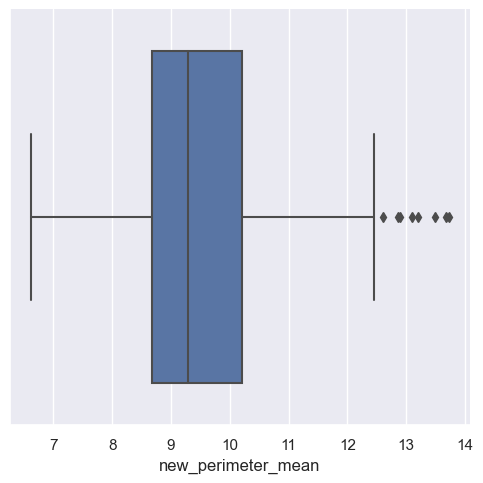

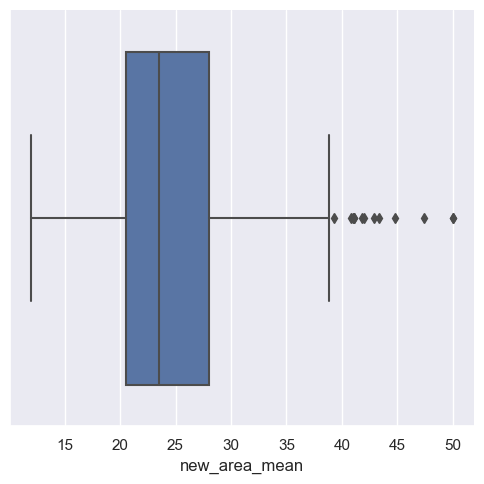

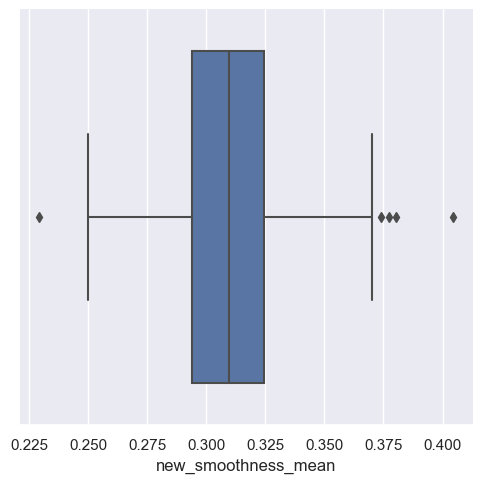

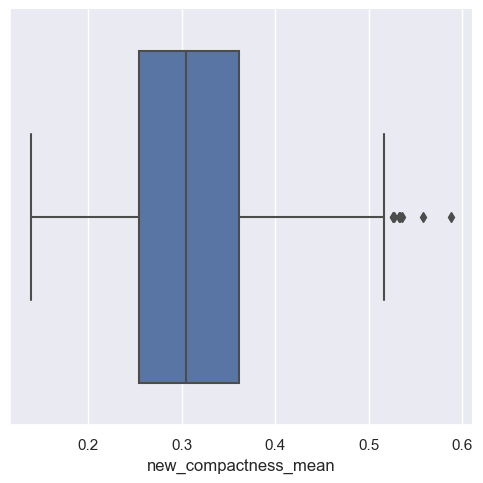

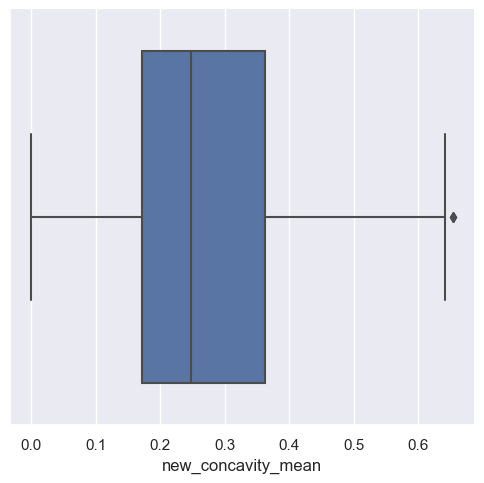

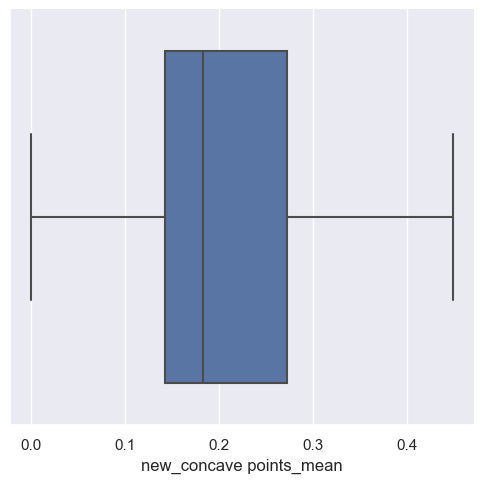

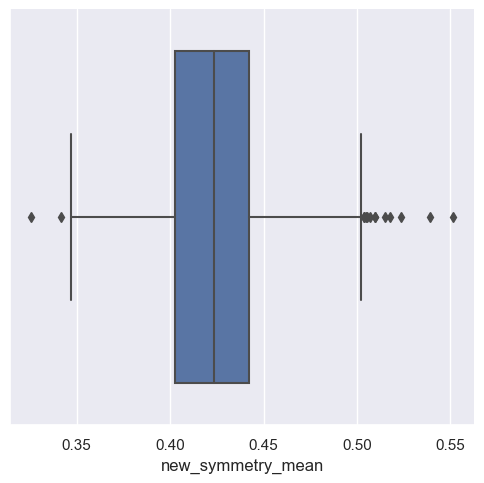

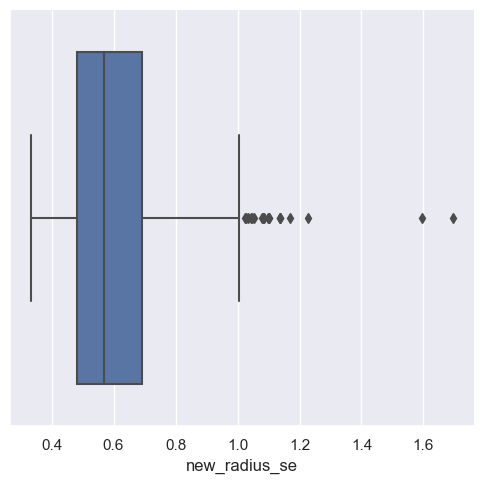

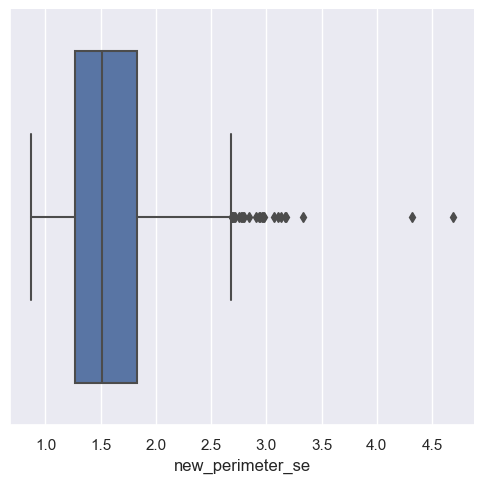

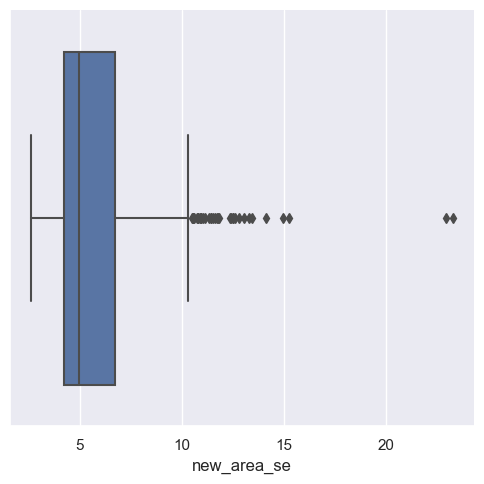

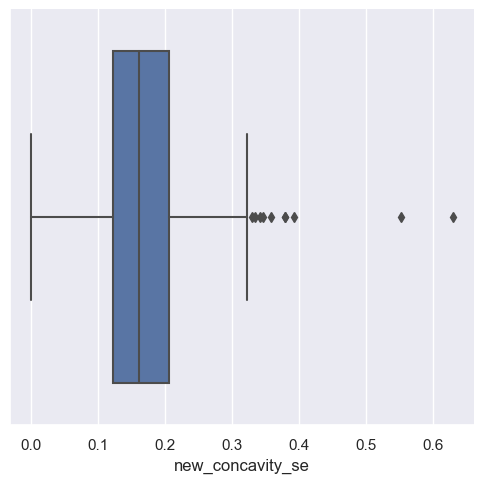

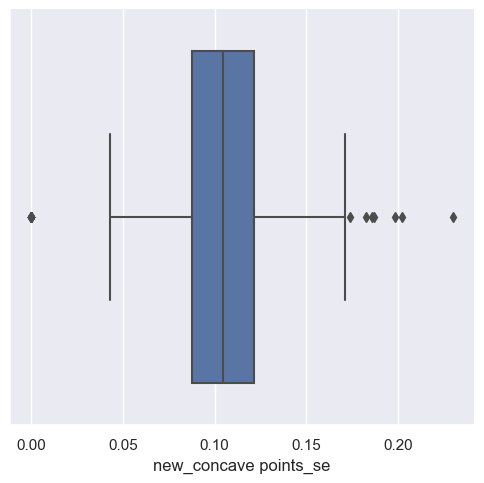

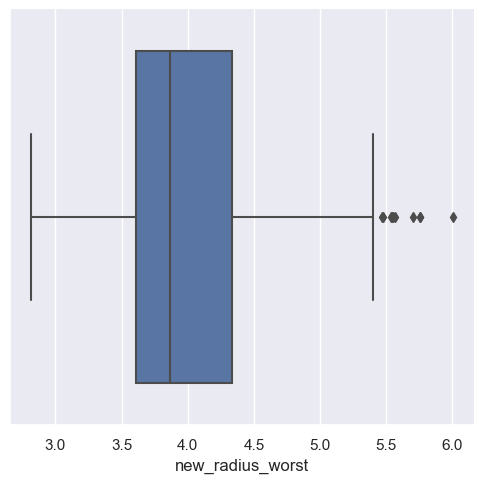

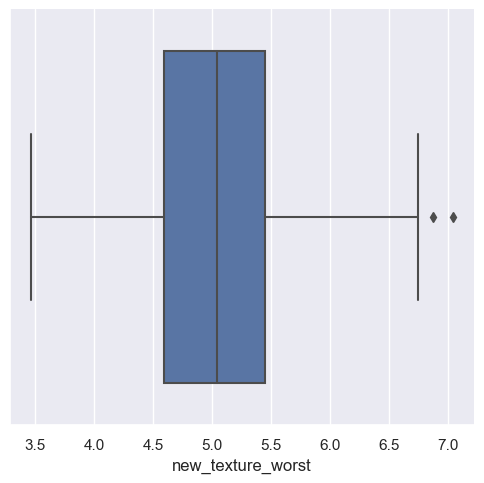

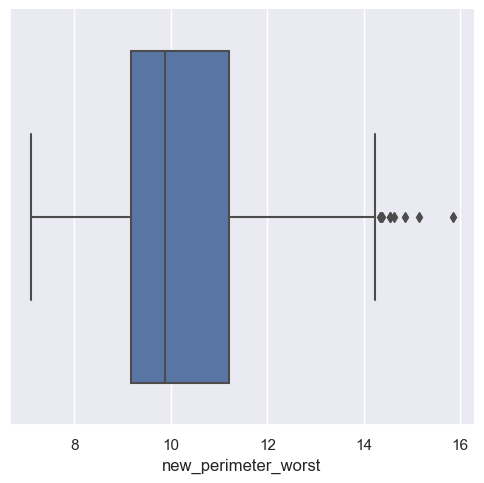

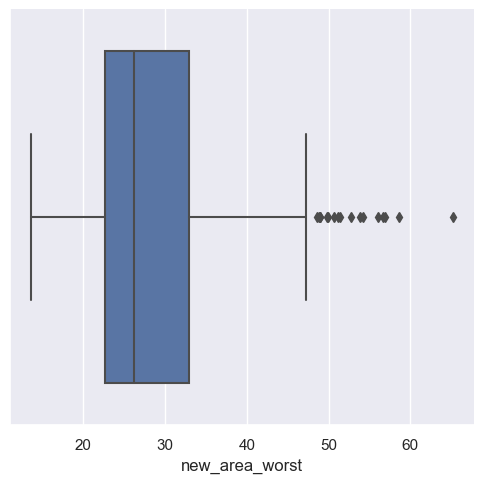

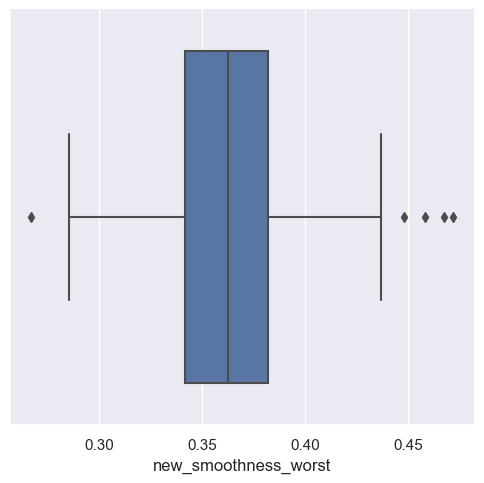

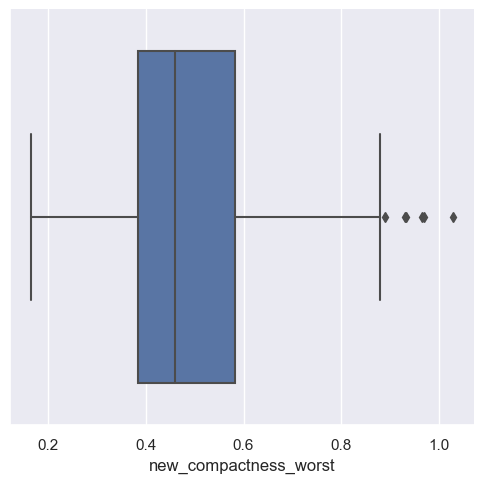

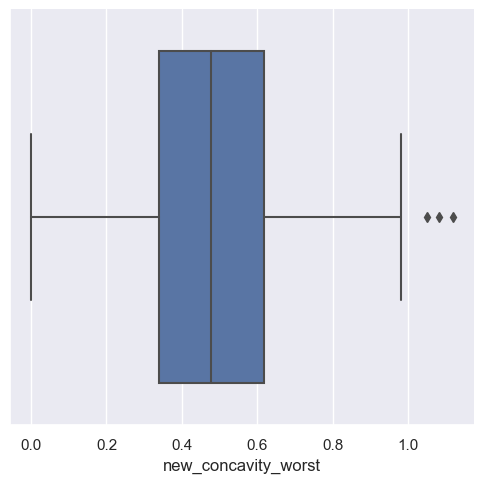

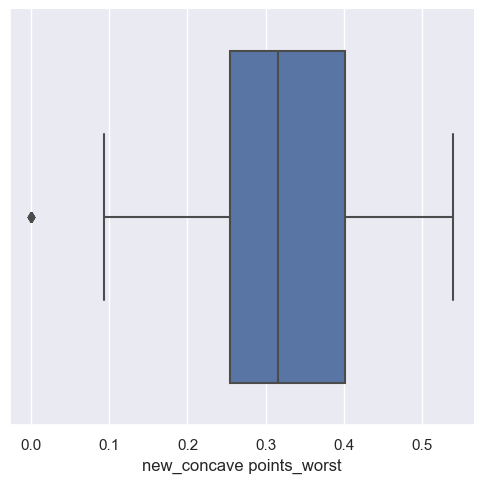

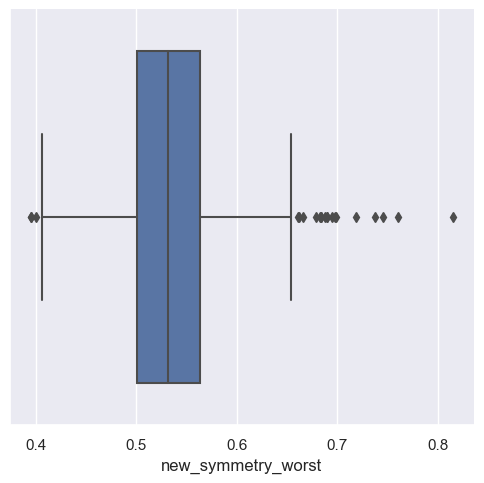

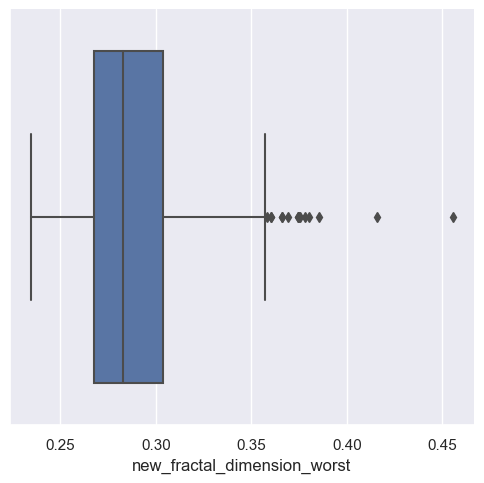

In [179]:
for value in float64_lst2:
    sns.catplot(data=df2, x=value, kind="box")
    
plt.show()

# Step 6: Data Preparation

### Goal:- 
Tasks we are going to in this step
1. Now we spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.
2. Split dataset into train and test dataset

#### 1. Now we spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.


In [180]:
# Spearate target and feature column in X and y variable
target = ['new_diagnosis']
X = df2.drop(target,axis=1)
y = df2[target]

In [181]:
# Check the shape of X and y variable
X.shape, y.shape

((569, 24), (569, 1))

#### 2. Split dataset into train and test dataset
Here we are spliting our dataset into 70/30 percentage where 70% dataset goes into the training and 30% goes into testing the part. 

In [182]:
# Split the X and y into X_train, X_test, y_train, y_test variables with 80-20% split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [183]:
# Check shape of the splitted variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 24), (114, 24), (455, 1), (114, 1))

## Observation: -
Here, we split the dataset into four parts

# Step 7: Model Training 

## In this step we are going to train our dataset on different Machine Learning algorithms. As we know that our target variable is not in continous format so we have to apply classification algorithms.

### Algorithms we are going to use in this step are: -

#### 1) Logistic Regression
#### 2) Decision Tree
#### 3) Random Forest
#### 4) K-nearest Neighbors

## Logistic Regression

In [184]:
# Declaring Logistic regression model object
log_reg = LogisticRegression()

In [185]:
# Train or fit Train dataset on Logistic regression model
log_reg.fit(X_train,y_train)

LogisticRegression()

In [186]:
# predict the values on X_test_scaled dataset 
l_y_predicted = log_reg.predict(X_test)

In [187]:
#Accuracy Check
l_acc = accuracy_score(y_test, l_y_predicted)*100

In [188]:
l_acc

97.36842105263158

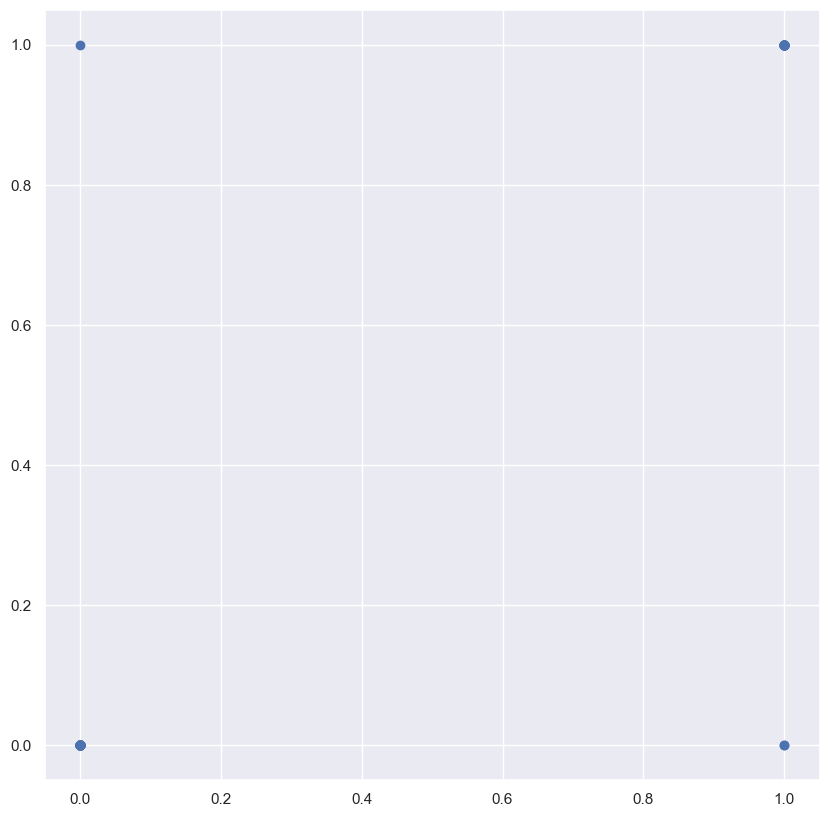

In [189]:
sns.set(rc = {'figure.figsize':(10,10)})
plt.scatter(y_test, l_y_predicted)
plt.show()

## Decision Tree

In [190]:
dec=DecisionTreeClassifier()

In [191]:
dec = dec.fit(X_train,y_train)

In [192]:
d_y_predicted = dec.predict(X_test)

In [193]:
d_acc = accuracy_score(y_test, d_y_predicted)*100

In [194]:
d_acc

92.98245614035088

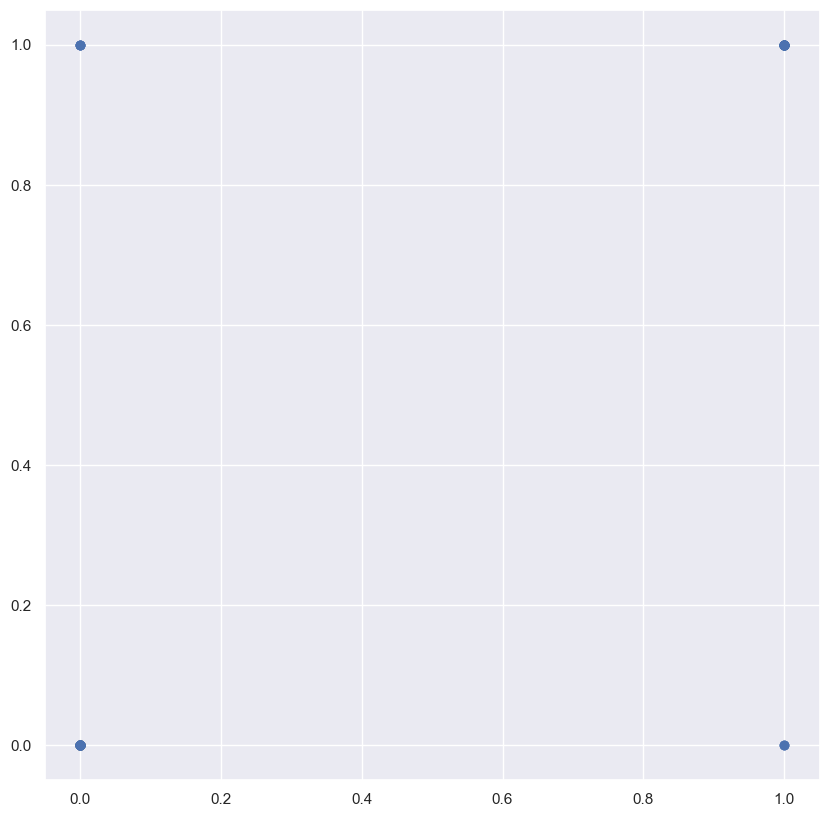

In [195]:
plt.scatter(y_test, d_y_predicted)
plt.show()

## Random Forest 

In [196]:
rad=RandomForestClassifier(max_depth=2, random_state=0)

In [197]:
rad.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [198]:
r_y_pred = rad.predict(X_test)

In [199]:
r_acc = accuracy_score(y_test, r_y_pred)*100

In [200]:
r_acc

96.49122807017544

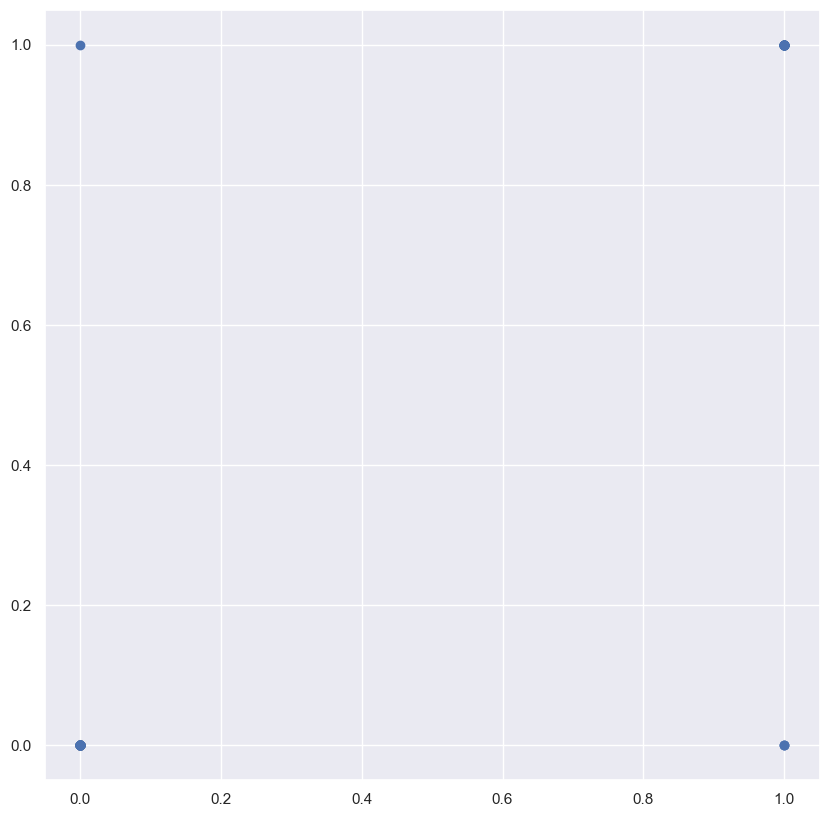

In [201]:
plt.scatter(y_test, r_y_pred)
plt.show()

## K-nearest Neighbors

In [202]:
kn = KNeighborsClassifier()

In [203]:
kn.fit(X_train, y_train)

KNeighborsClassifier()

In [204]:
k_y_predicted = kn.predict(X_test)

In [205]:
k_acc = accuracy_score(y_test, k_y_predicted)*100

In [206]:
k_acc

97.36842105263158

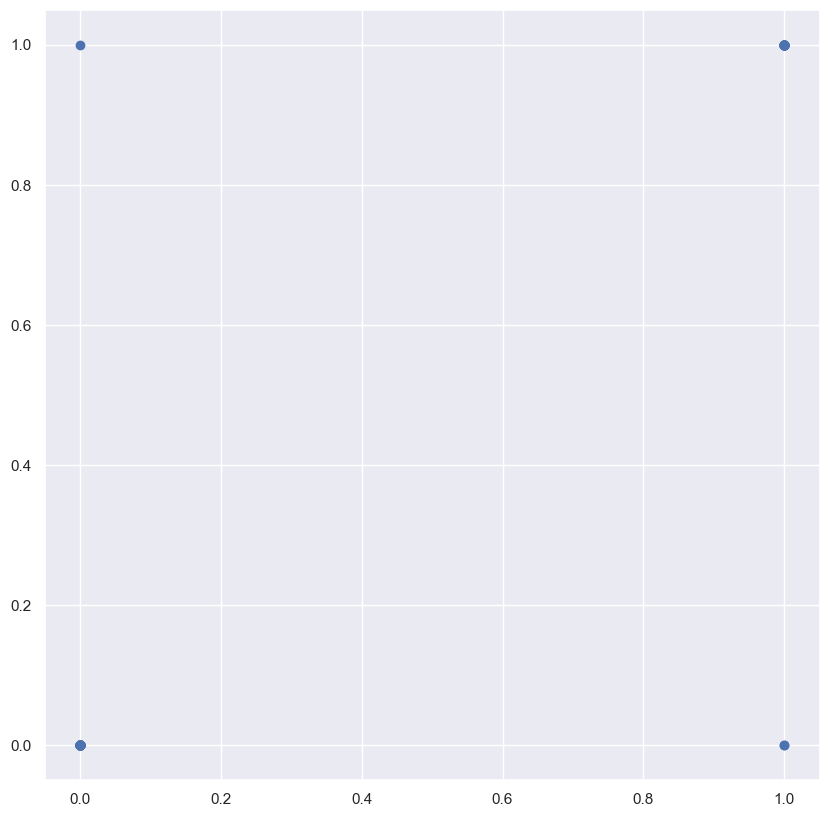

In [207]:
plt.scatter(y_test, k_y_predicted)
plt.show()

## Evaluation

In [208]:
cal_metric=pd.DataFrame([l_acc,d_acc,r_acc,k_acc],columns=["Score in percentage"])

In [209]:
cal_metric.index=['Logistic Regression',
                  'Decision Tree',
                  'Random Forest',
                  'K-nearest Neighbors'
                 ]

In [210]:
cal_metric

Score in percentage
Logistic Regression            97.368421
Decision Tree                  92.982456
Random Forest                  96.491228
K-nearest Neighbors            97.368421

## Observation: -
Here, we can see that the logistic regression give high accuracy

# Step 8: Save Model

####  In this step we are going to save our model in pickel format file.

In [211]:
import pickle
pickle.dump(log_reg, open('C:\\Users\\Lenovo\Desktop\\Data Science project\\Breast cancer Final\\model\\breast_cancer_detection_Logistic.pkl', 'wb'))
pickle.dump(dec, open('C:\\Users\\Lenovo\Desktop\\Data Science project\\Breast cancer Final\\model\\breast_cancer_detection_Decision.pkl', 'wb'))
pickle.dump(rad, open('C:\\Users\\Lenovo\Desktop\\Data Science project\\Breast cancer Final\\model\\breast_cancer_detection_Random.pkl', 'wb'))
pickle.dump(rad, open('C:\\Users\\Lenovo\Desktop\\Data Science project\\Breast cancer Final\\model\\breast_cancer_detection_KNearest.pkl', 'wb'))

In [212]:
def model_prediction(features, model):
    
    pickled_model = pickle.load(open(model, 'rb'))
    lung_cancer_detect = str((list(pickled_model.predict(features))))
    
    return str(lung_cancer_detect)

In [213]:
print(model_prediction(X_test.iloc[0:12,:],'C:\\Users\\Lenovo\Desktop\\Data Science project\\Breast cancer Final\\model\\breast_cancer_detection_Logistic.pkl'))
print(model_prediction(X_test.iloc[0:12,:],'C:\\Users\\Lenovo\Desktop\\Data Science project\\Breast cancer Final\\model\\breast_cancer_detection_Decision.pkl'))
print(model_prediction(X_test.iloc[0:12,:],'C:\\Users\\Lenovo\Desktop\\Data Science project\\Breast cancer Final\\model\\breast_cancer_detection_Random.pkl'))
print(model_prediction(X_test.iloc[0:12,:],'C:\\Users\\Lenovo\Desktop\\Data Science project\\Breast cancer Final\\model\\breast_cancer_detection_KNearest.pkl'))

[0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1]
[0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1]
[0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1]
[0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1]


## Observation: -
In this step we save our model in pickel file format so we can use it now anywhere for prediction purpose 